In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from publish import *

# SURVEY DATA

In [2]:
survey_data = pd.read_csv("acs_5yr_est_selected_economic_characteristics_2010-2022.csv")

survey_data

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010
...,...,...,...,...,...,...,...,...
98015,18 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),39.7%,±0.4,2021
98016,18 to 64 years,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.1%,±0.4,2021
98017,65 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),38.5%,±0.5,2021
98018,People in families,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.0%,±0.4,2021


In [18]:
# Convert the "Estimate" data from strings to floats
survey_data["Estimate"] = survey_data["Estimate"].apply(lambda x: x if type(x) == float or x == "(X)" else float(x.replace(",", "")))

# Convert the "Percent" data from strings to floats
survey_data["Percent"] = survey_data["Percent"].apply(lambda x: x if type(x) == float or x == "(X)" else float(x.replace(",", "").replace("%", "")))

In [19]:
labels = {}
for _, row in survey_data.iterrows():
    if pd.isnull(row["Estimate"]):
        cur_grouping = row["Label (Grouping)"]
        if cur_grouping not in labels:
            labels[cur_grouping] = set()
    else:
        labels[cur_grouping].add(str(row["Label (Grouping)"]))#.replace("\xa0", ""))

labels   

{'EMPLOYMENT STATUS': {'Females 16 years and over',
  'Own children 6 to 17 years',
  'Own children of the householder 6 to 17 years',
  'Own children of the householder under 6 years',
  'Own children under 6 years',
  'Population 16 years and over',
  '\xa0\xa0\xa0\xa0All parents in family in labor force',
  '\xa0\xa0\xa0\xa0Civilian labor force',
  '\xa0\xa0\xa0\xa0In labor force',
  '\xa0\xa0\xa0\xa0Not in labor force',
  '\xa0\xa0\xa0\xa0Percent Unemployed',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0All parents in family in labor force',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Armed Forces',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Civilian labor force',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0In labor force',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Not in labor force',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Percent Unemployed',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Unemployment Rate',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Armed Forces',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Civilian labor

In [20]:
# A lot of the data is the same with just different inflation adjustments, I wil arbitrarily pick the 2010 inflation and delete the rest
for x in list(range(11, 25)):
    delete_label = f"INCOME AND BENEFITS (IN 20{x} INFLATION-ADJUSTED DOLLARS)"
    if delete_label in labels:
        del labels[delete_label]

labels

{'EMPLOYMENT STATUS': {'Females 16 years and over',
  'Own children 6 to 17 years',
  'Own children of the householder 6 to 17 years',
  'Own children of the householder under 6 years',
  'Own children under 6 years',
  'Population 16 years and over',
  '\xa0\xa0\xa0\xa0All parents in family in labor force',
  '\xa0\xa0\xa0\xa0Civilian labor force',
  '\xa0\xa0\xa0\xa0In labor force',
  '\xa0\xa0\xa0\xa0Not in labor force',
  '\xa0\xa0\xa0\xa0Percent Unemployed',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0All parents in family in labor force',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Armed Forces',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Civilian labor force',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0In labor force',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Not in labor force',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Percent Unemployed',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Unemployment Rate',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Armed Forces',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Civilian labor

In [21]:
locations = survey_data["State"].unique()

locations

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

#### Going to only focus on aggregated data over all states, and then if any interesting trends arise, could try to find geographic trends

In [38]:
survey_dfs = {}

for grouping in labels:
    print(f"\n\n\n{grouping}\n\n\n")
    survey_dfs[grouping] = {}
    for label in list(labels[grouping]):
        condensed_df = survey_data[survey_data["Label (Grouping)"] == label]
        if all(condensed_df["Estimate"].values == "(X)"):
            continue
        elif any(condensed_df["Estimate"].values == "(X)"):
            print(condensed_df[condensed_df["Estimate"].values == "(X)"]["Year"].unique())
            condensed_df = condensed_df[condensed_df["Year"] > 2011] # this is explained by the printed output below
        survey_dfs[grouping][label] = condensed_df.groupby("Year").sum().reset_index()[["Estimate", "Year"]]




EMPLOYMENT STATUS






COMMUTING TO WORK






OCCUPATION






INDUSTRY






CLASS OF WORKER






INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)






HEALTH INSURANCE COVERAGE



[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]
[2010 2011]



PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL








EMPLOYMENT STATUS





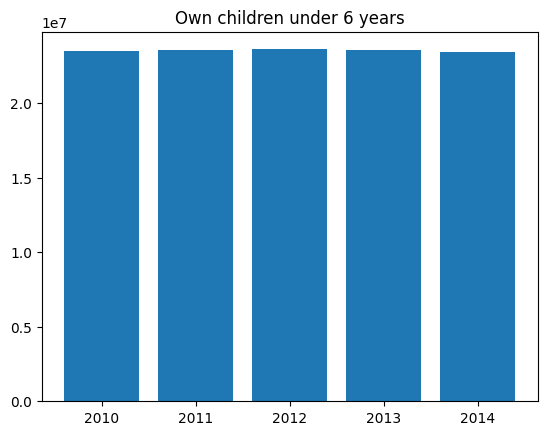

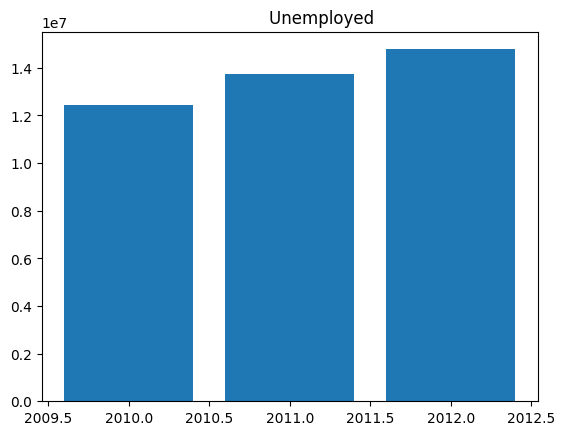

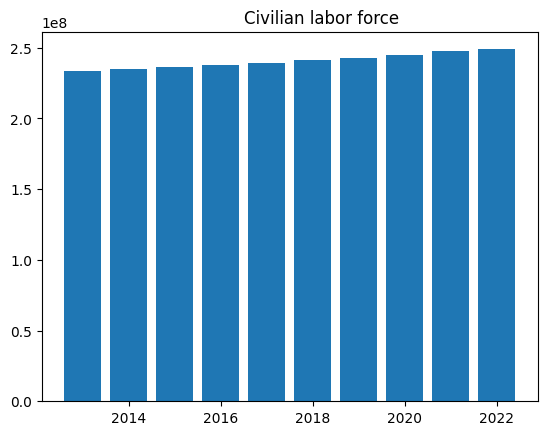

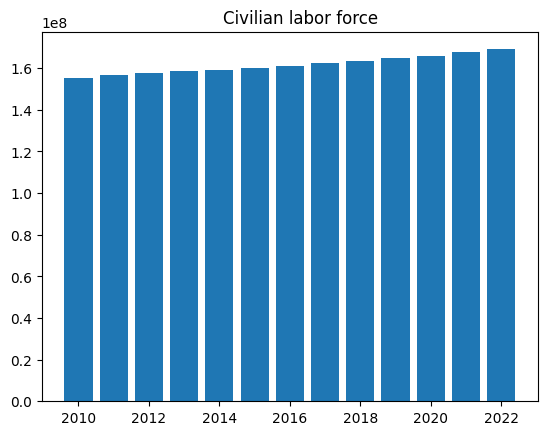

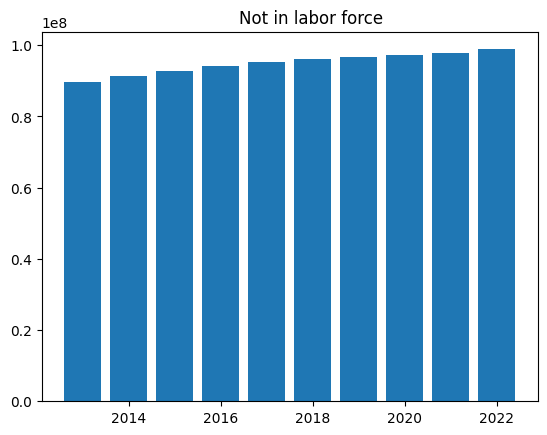

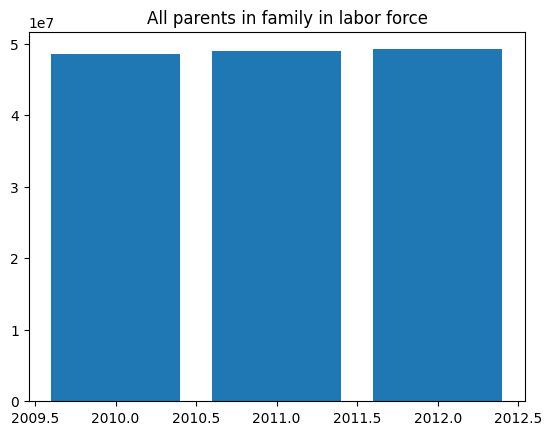

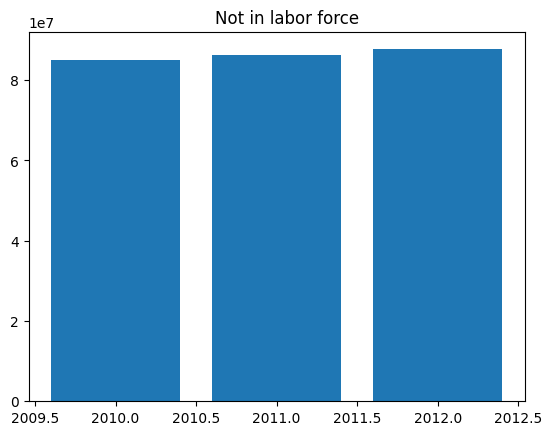

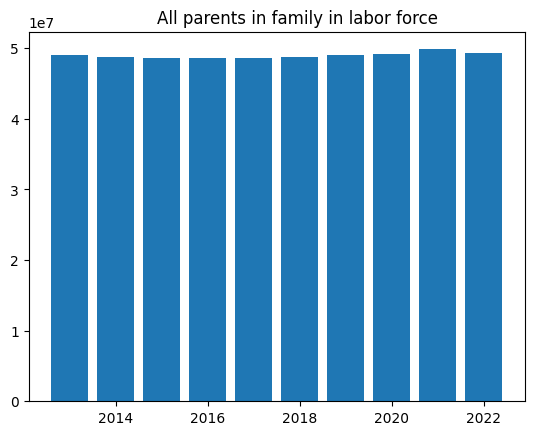

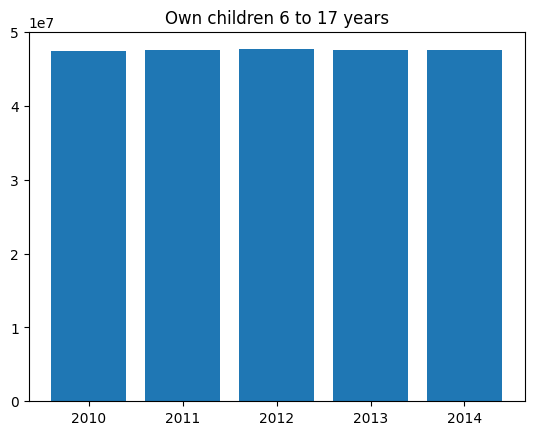

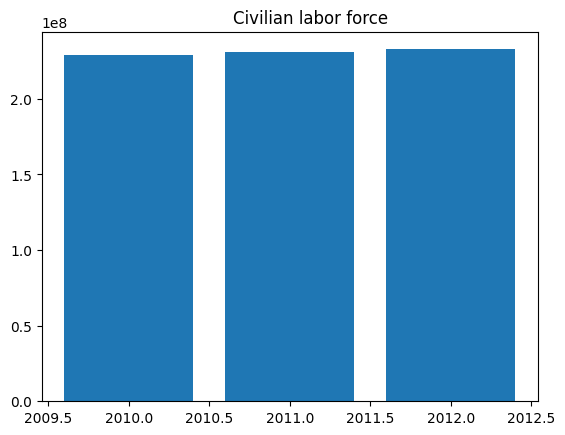

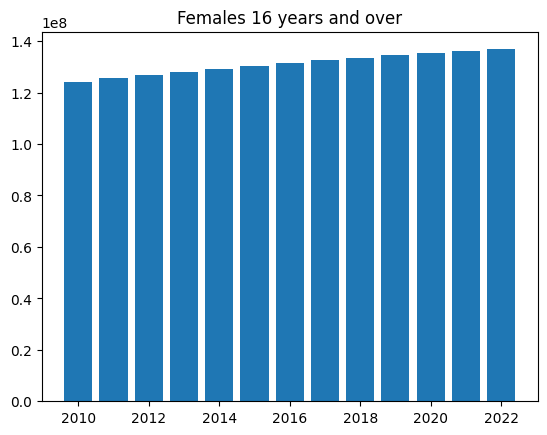

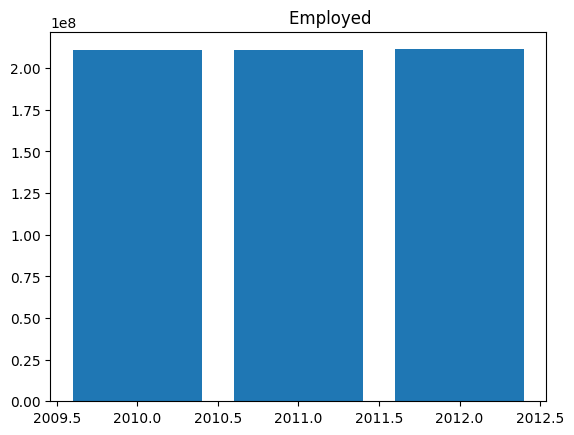

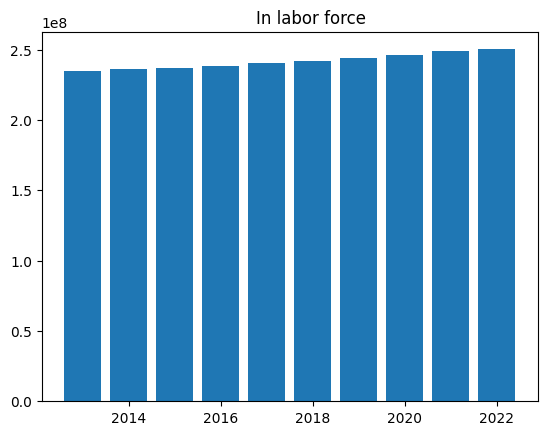

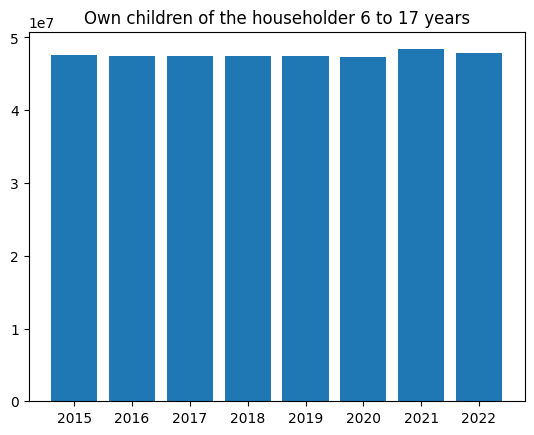

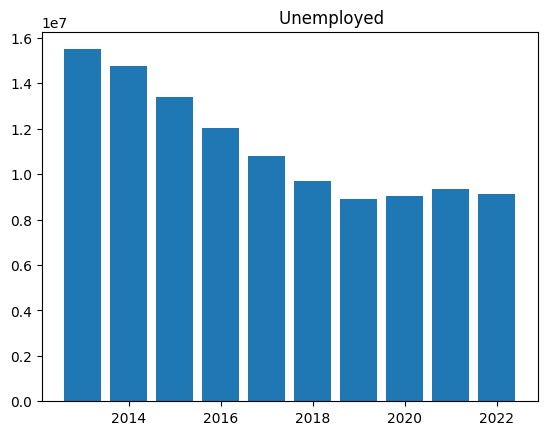

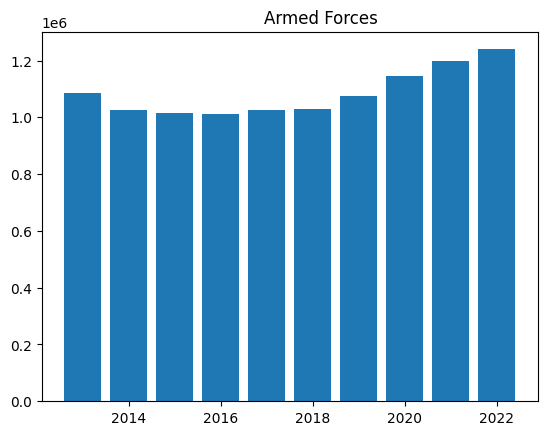

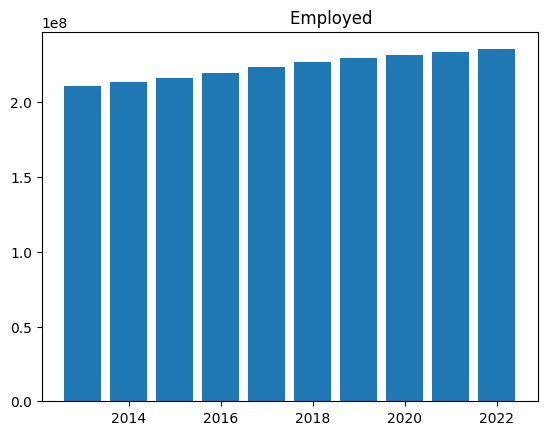

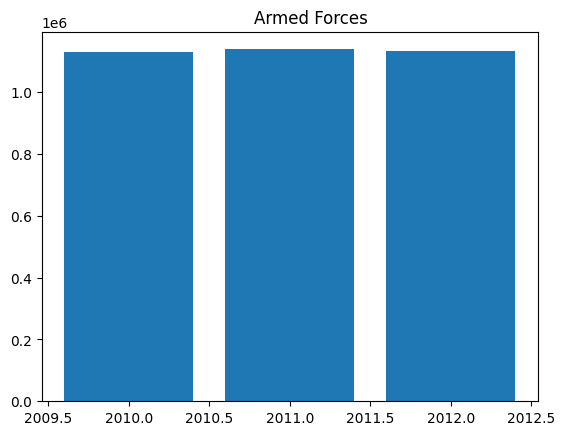

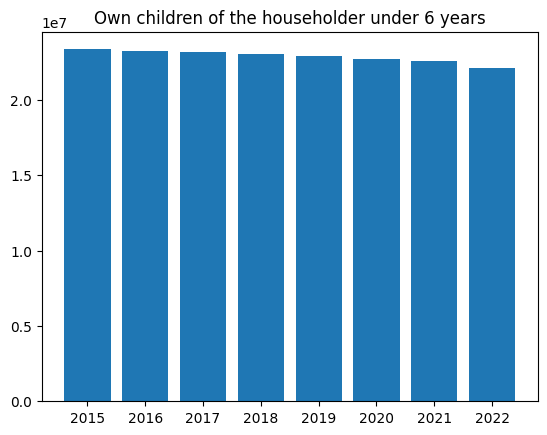

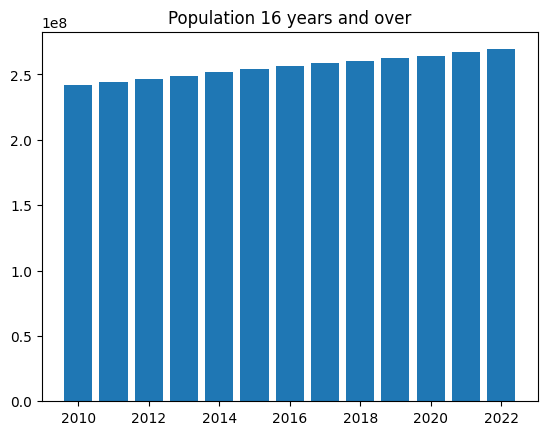

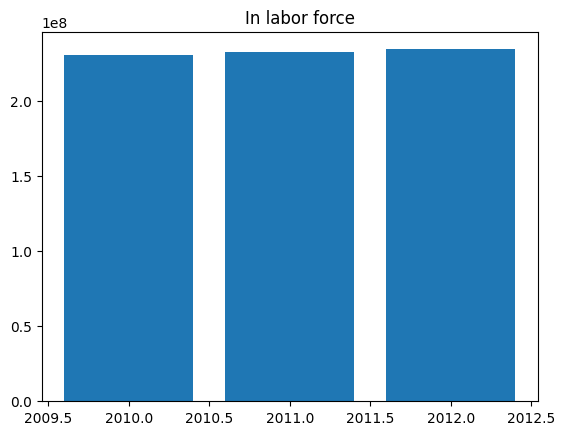




COMMUTING TO WORK





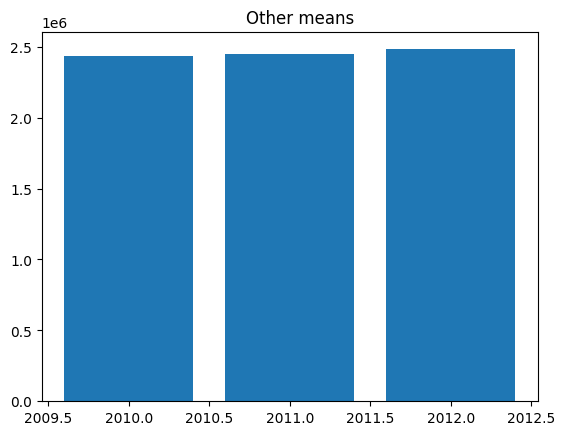

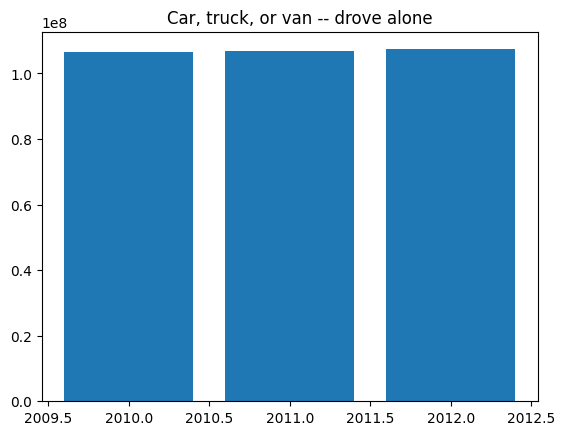

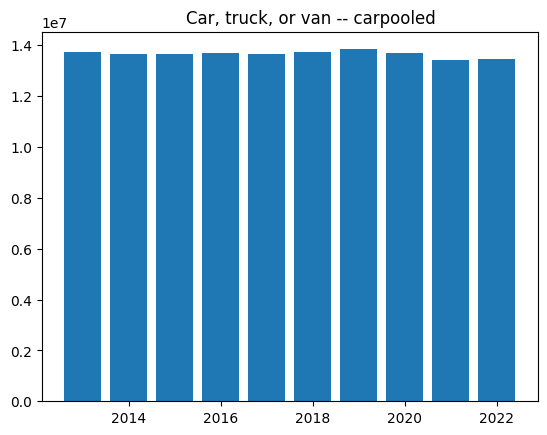

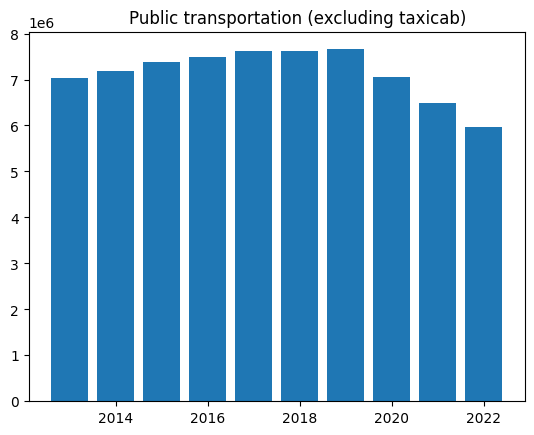

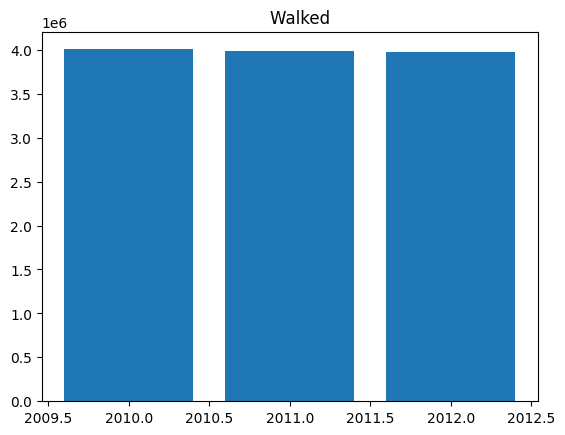

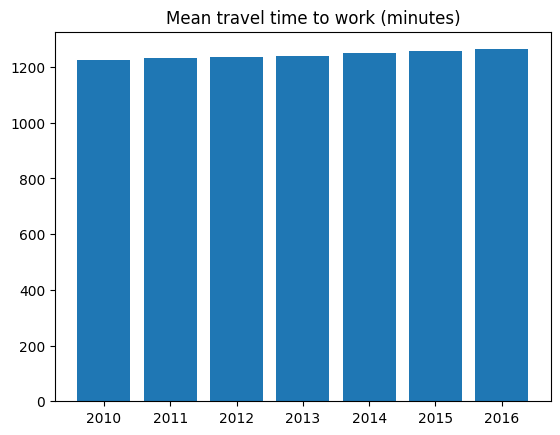

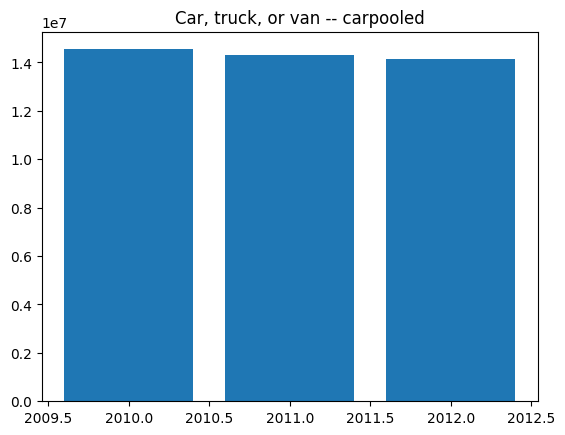

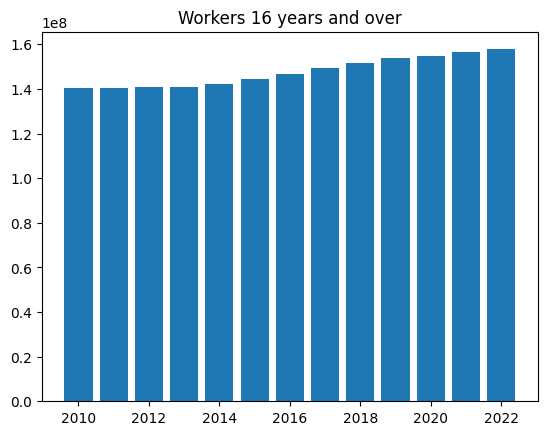

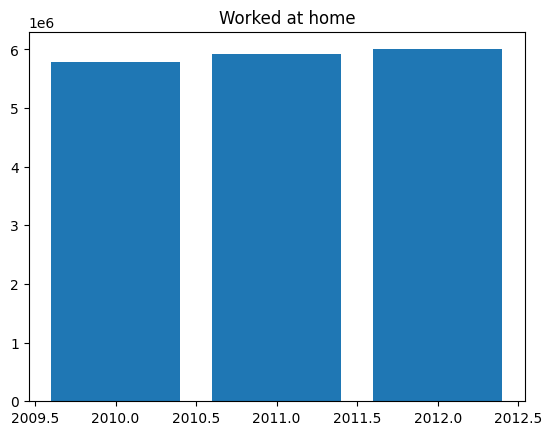

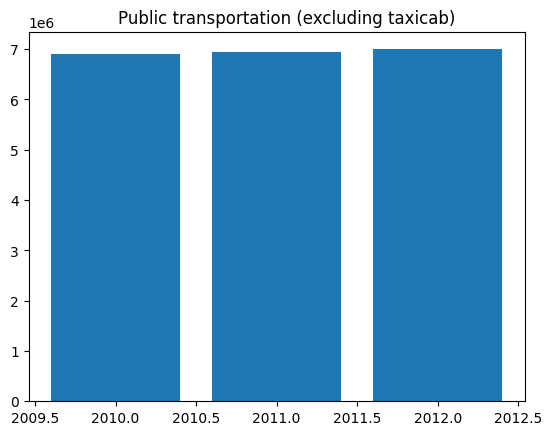

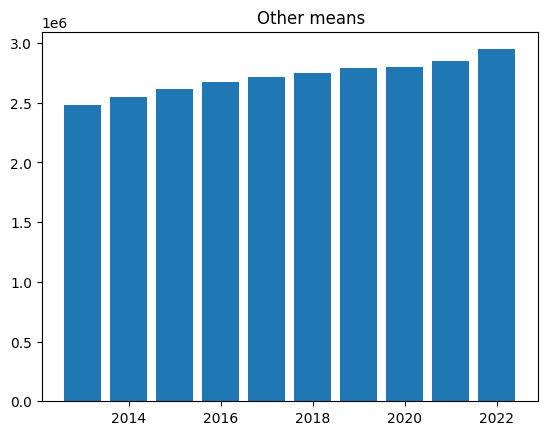

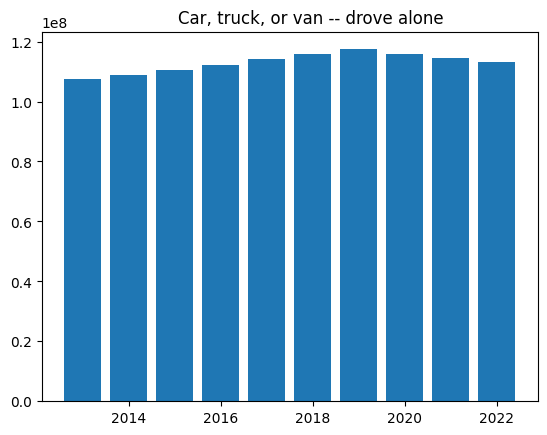

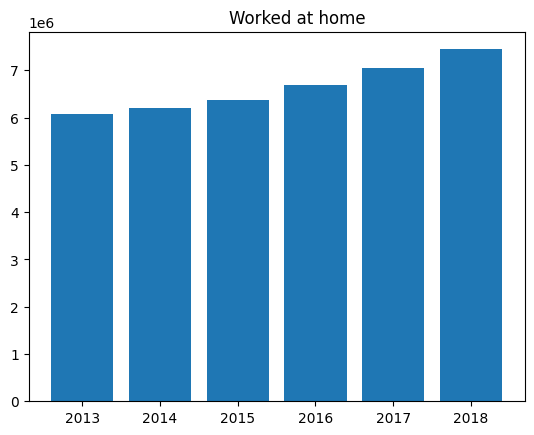

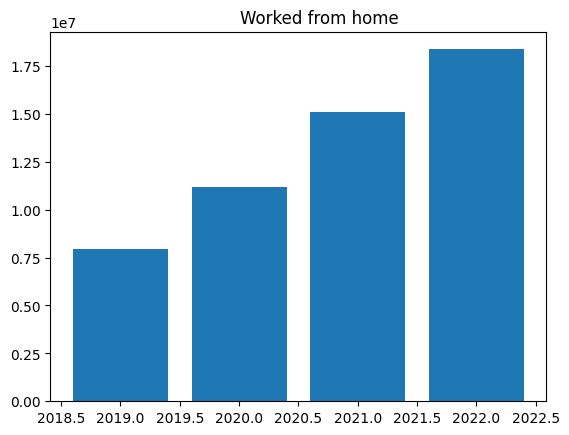

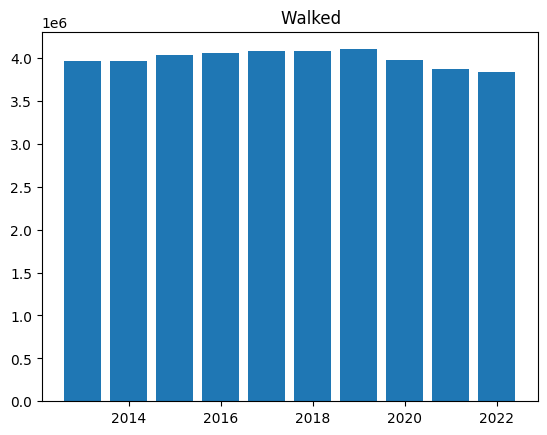

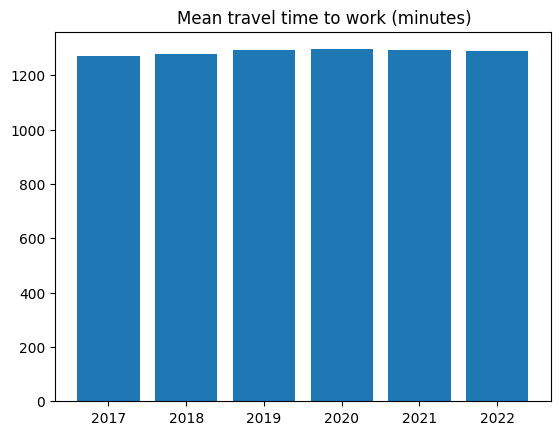




OCCUPATION





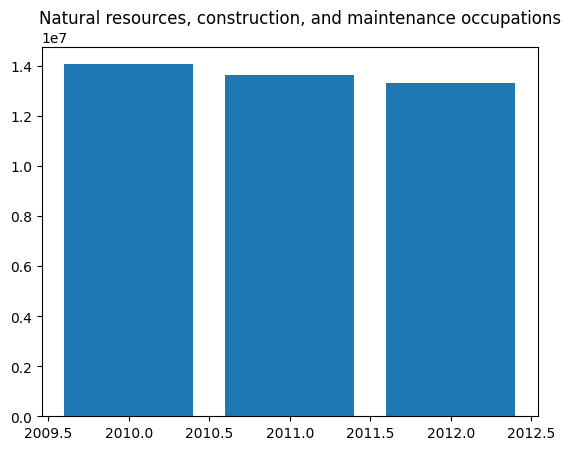

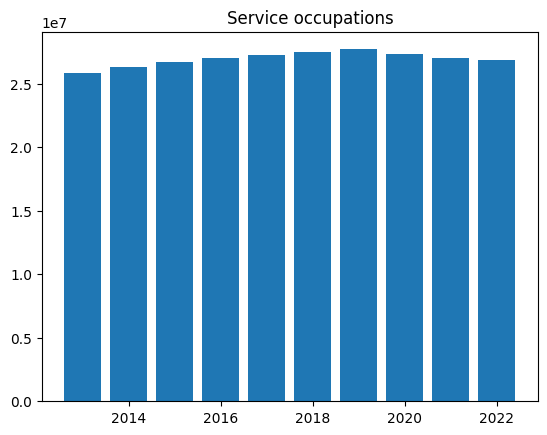

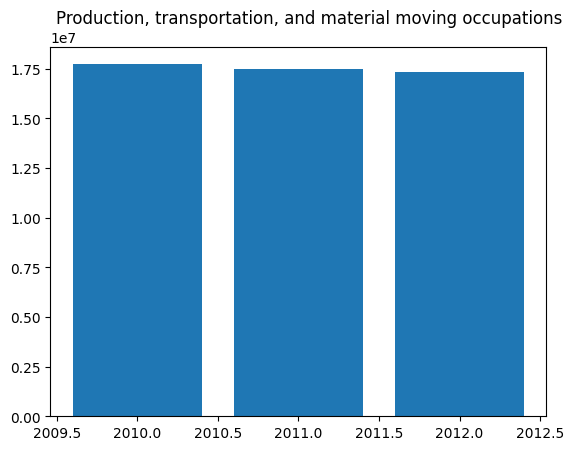

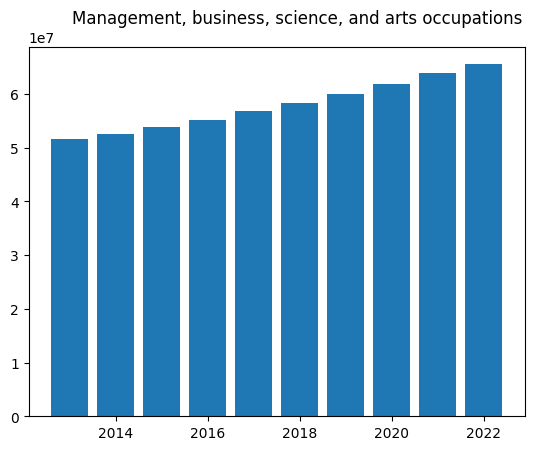

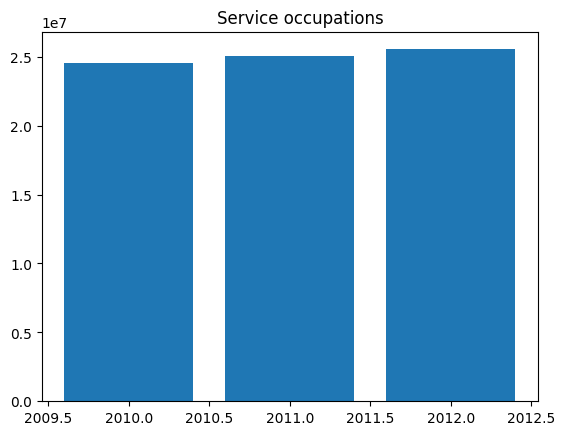

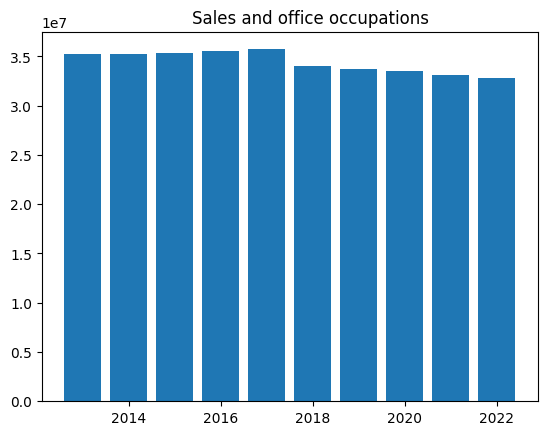

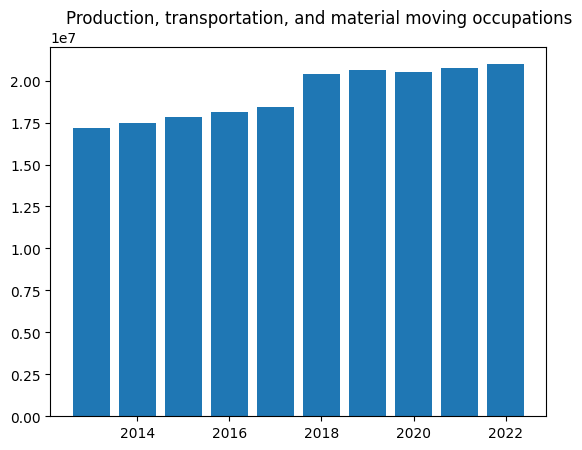

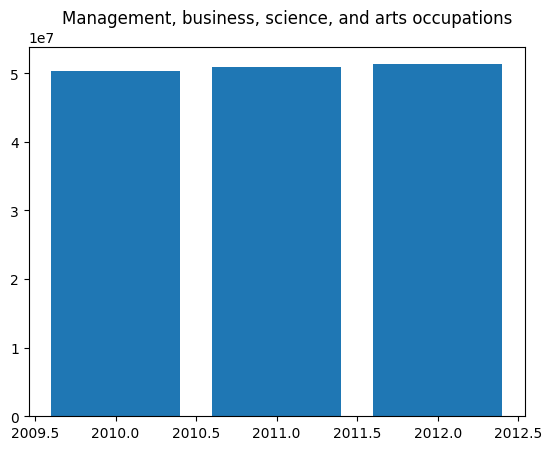

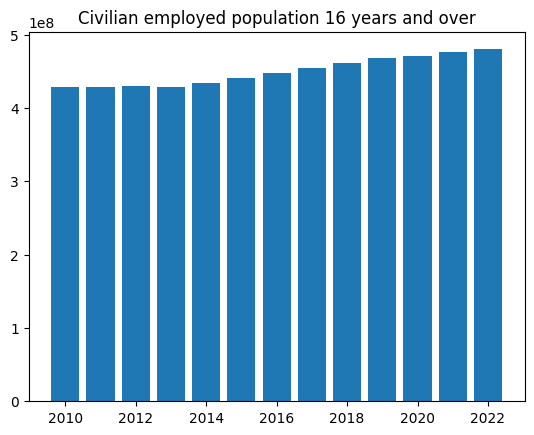

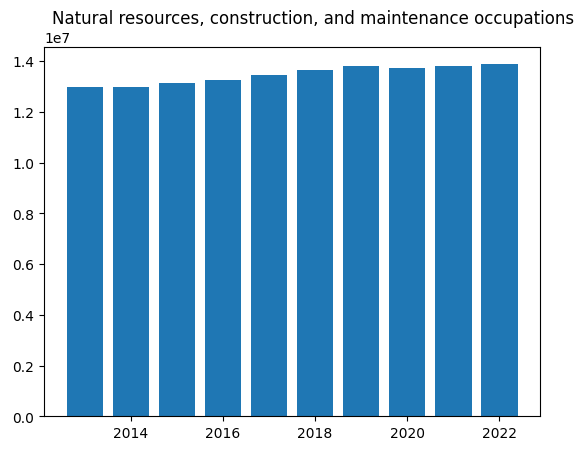

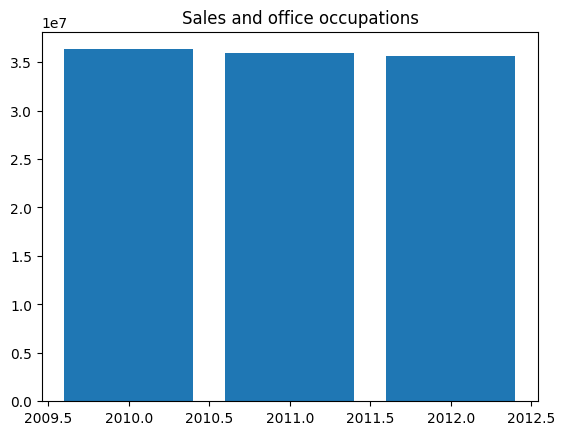




INDUSTRY





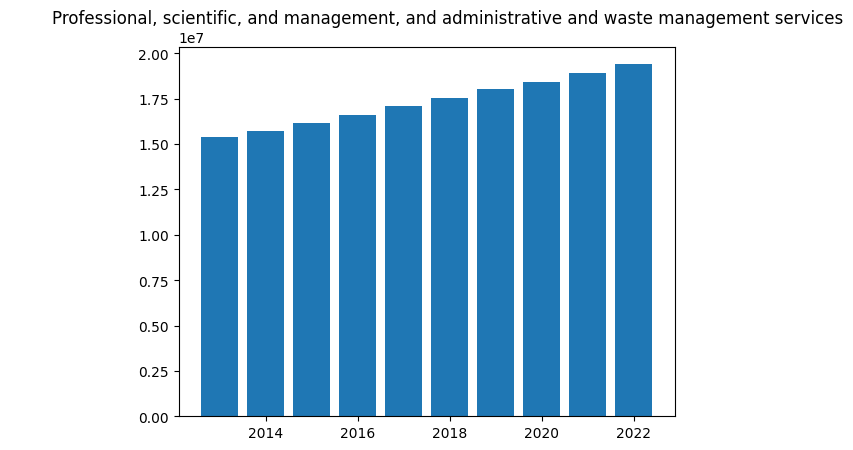

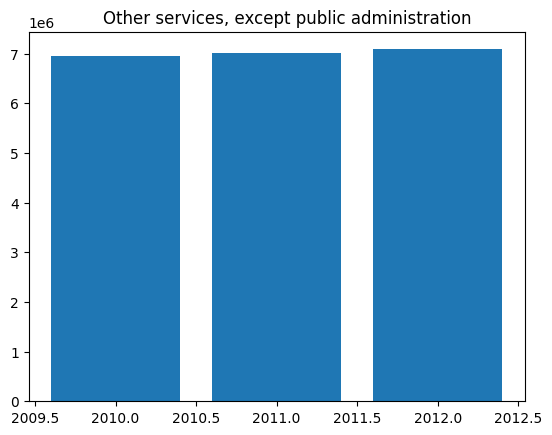

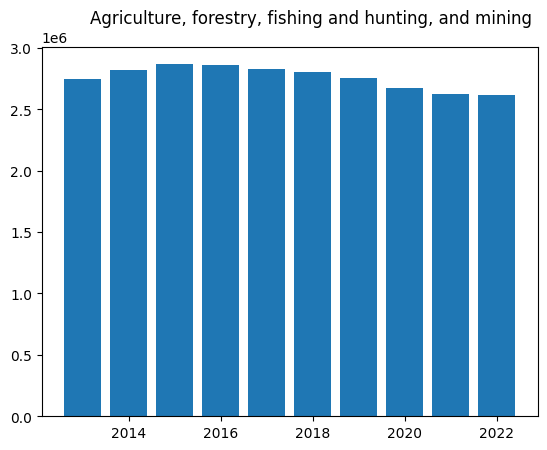

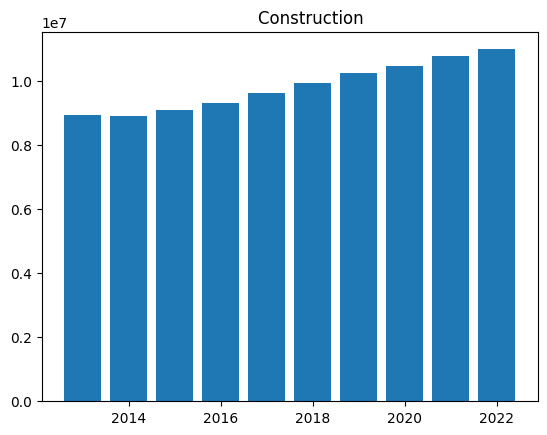

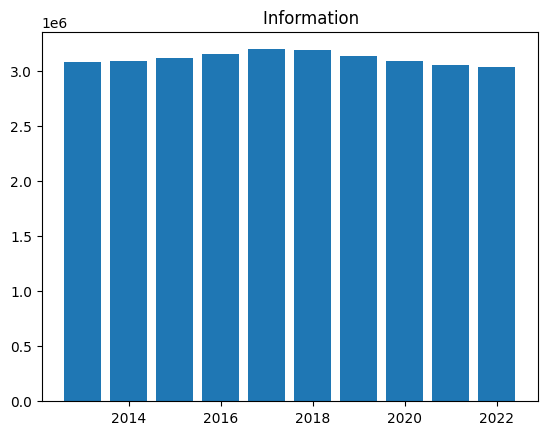

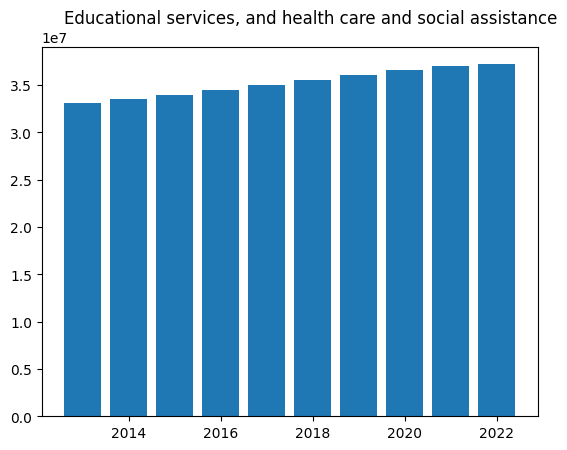

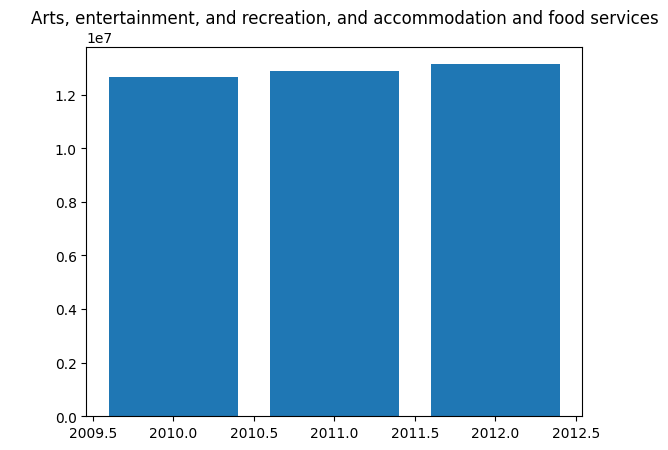

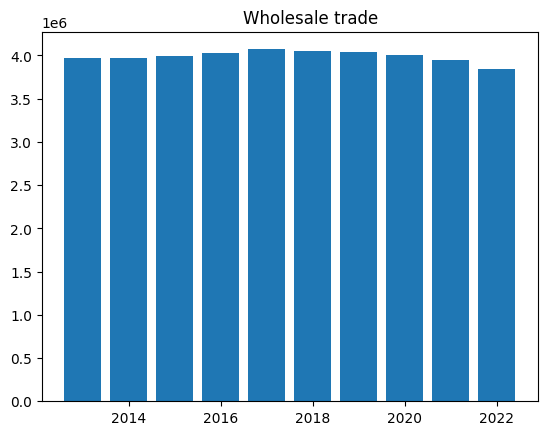

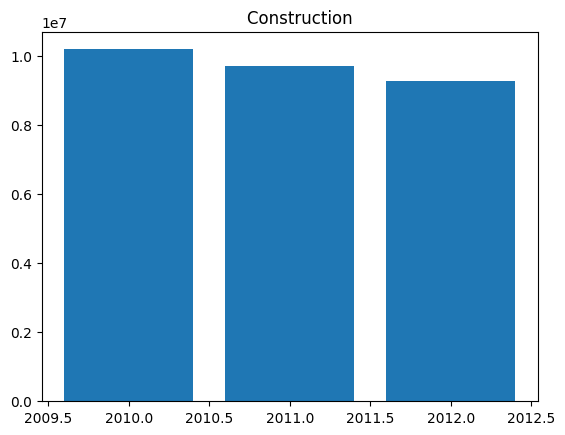

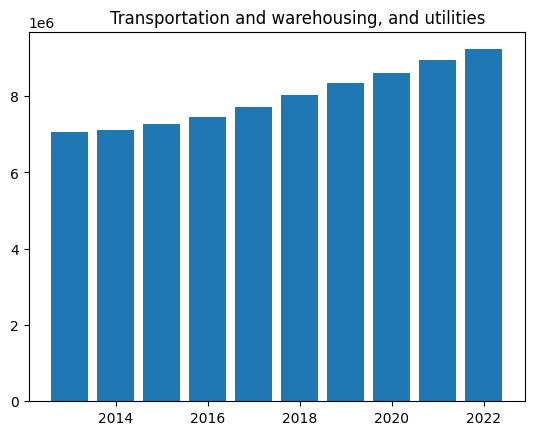

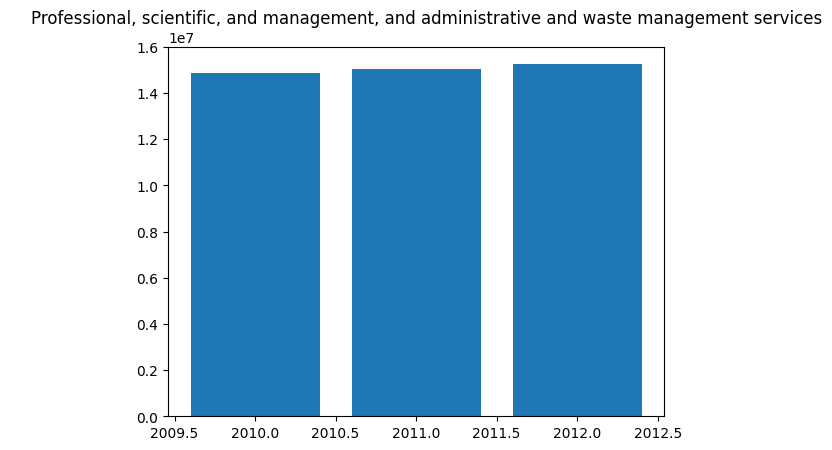

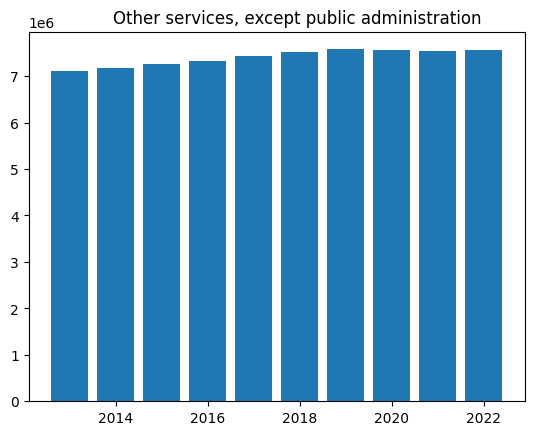

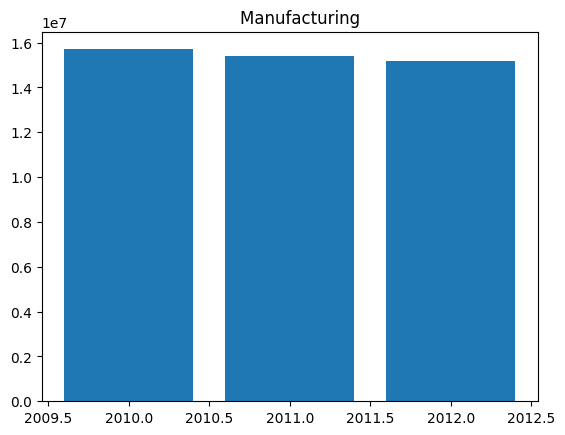

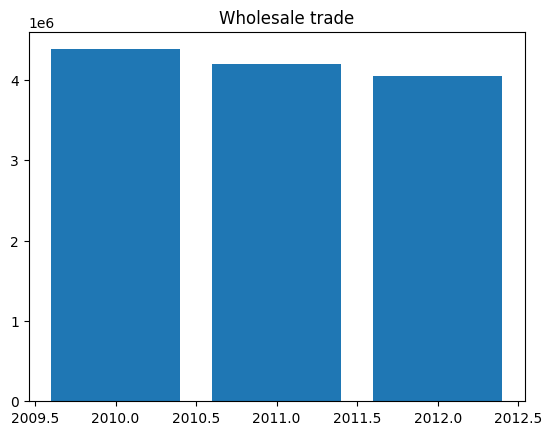

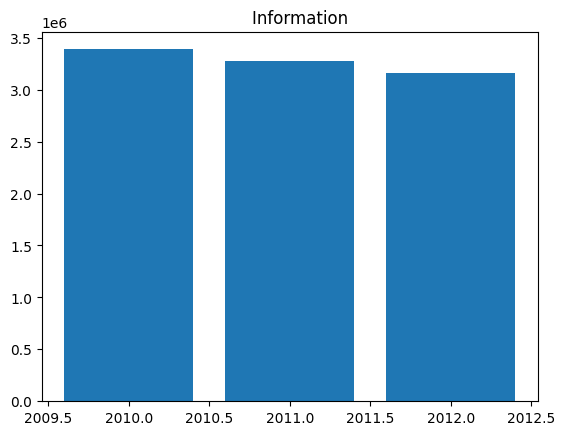

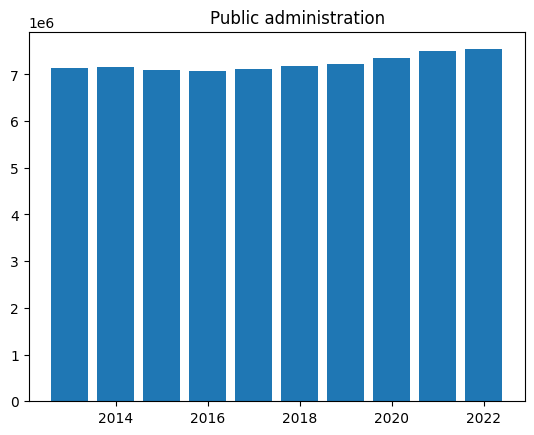

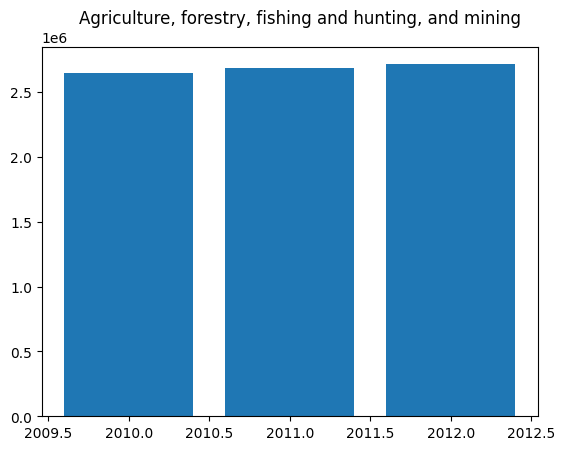

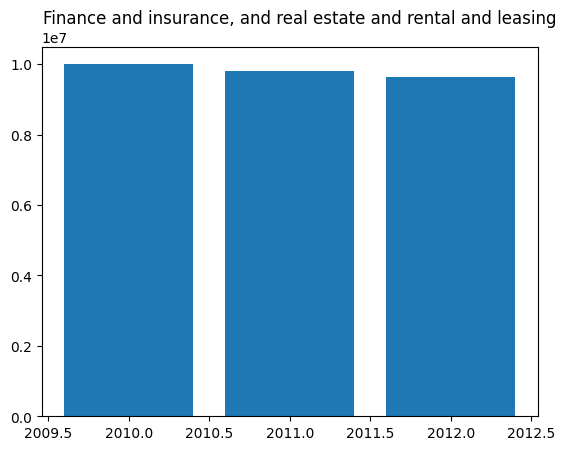

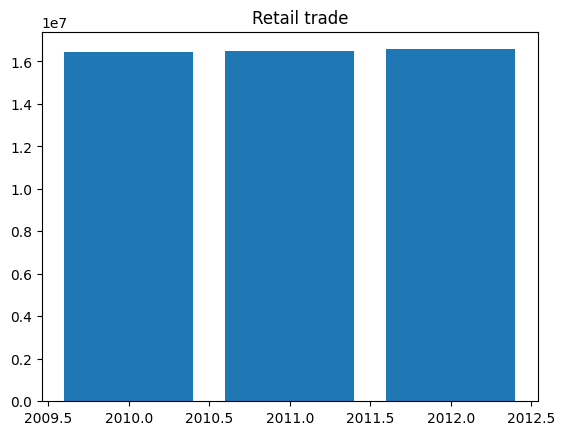

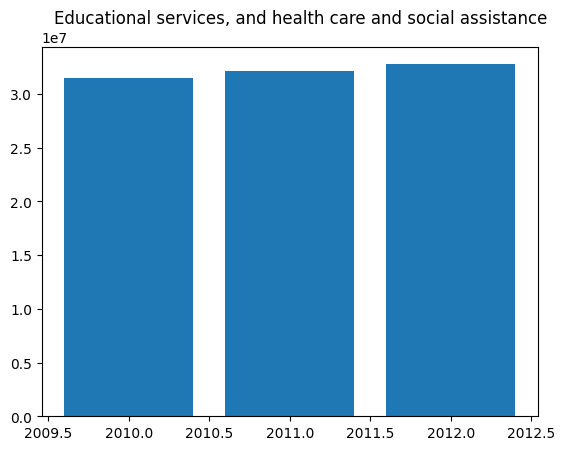

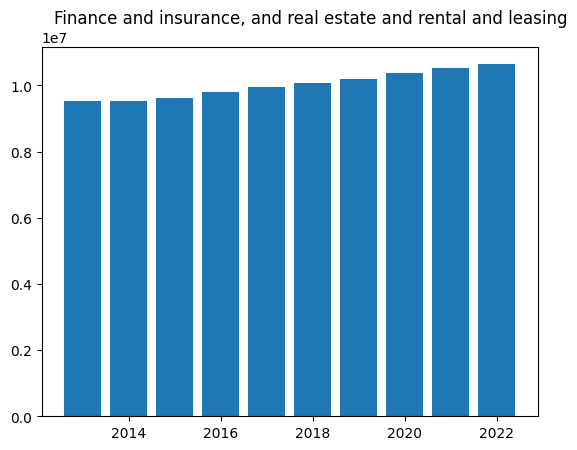

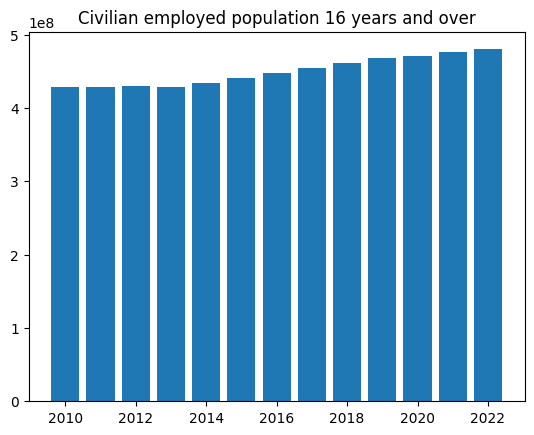

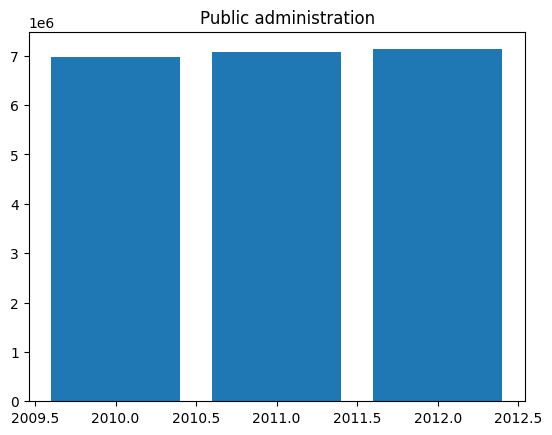

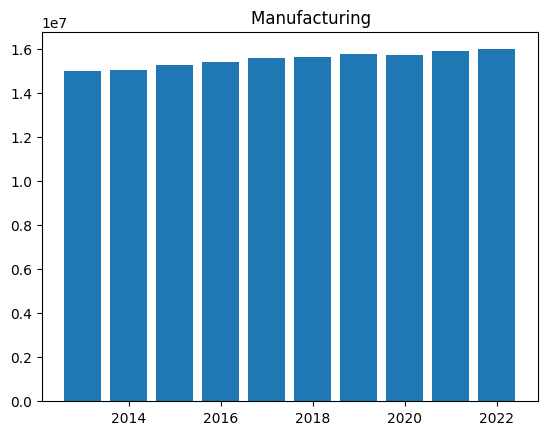

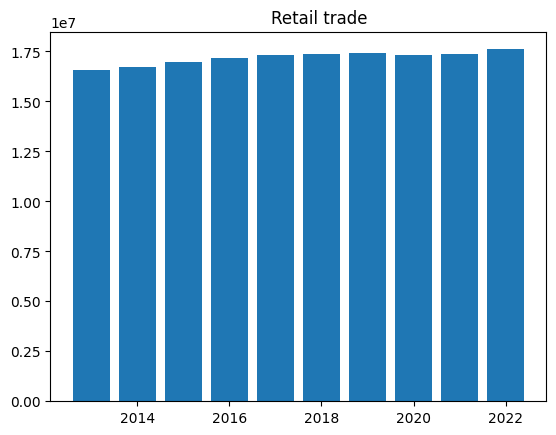

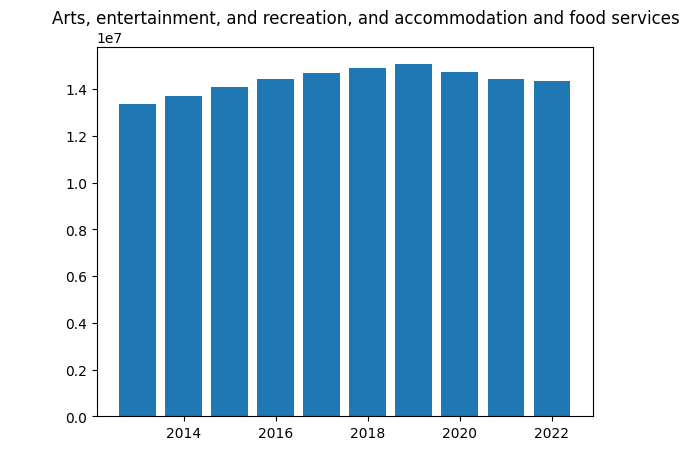

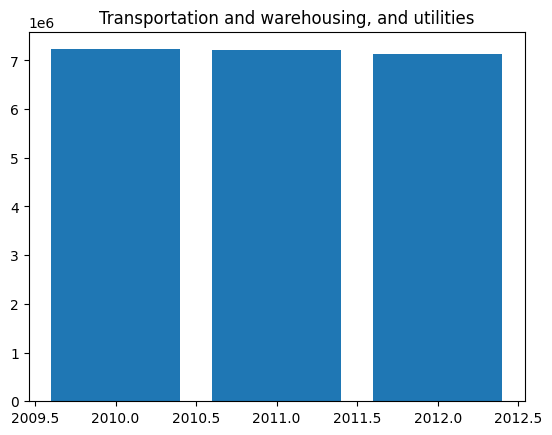




CLASS OF WORKER





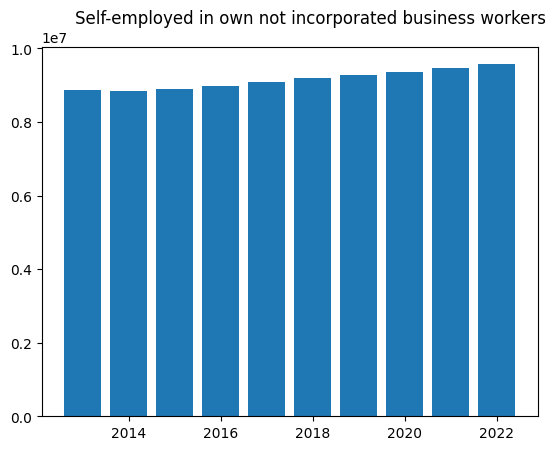

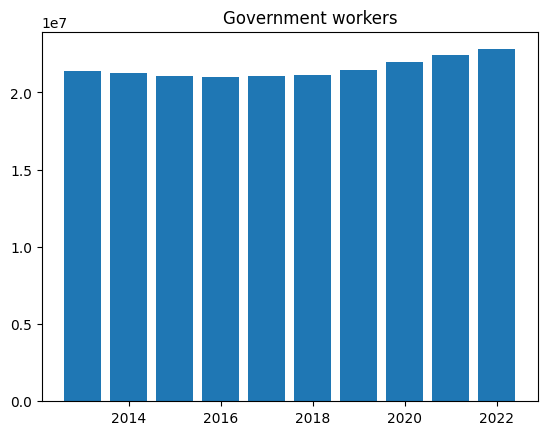

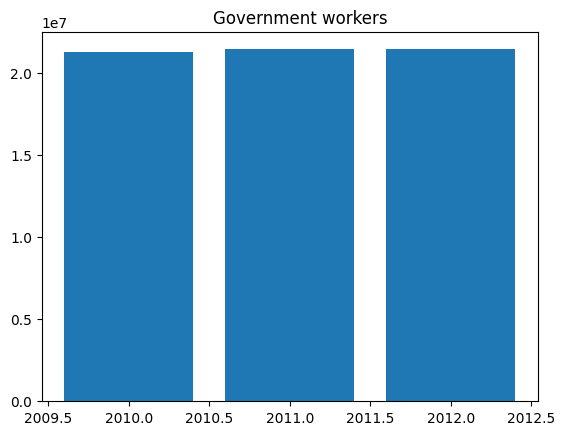

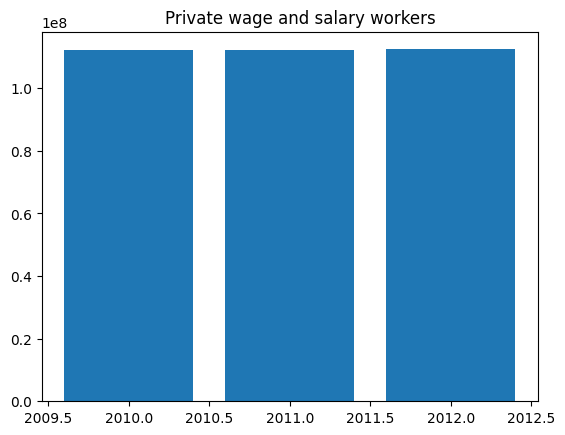

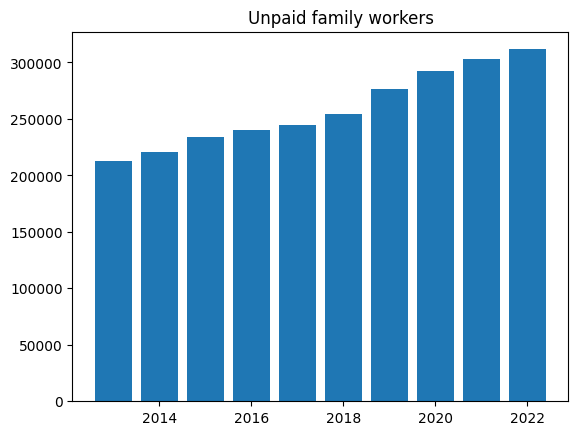

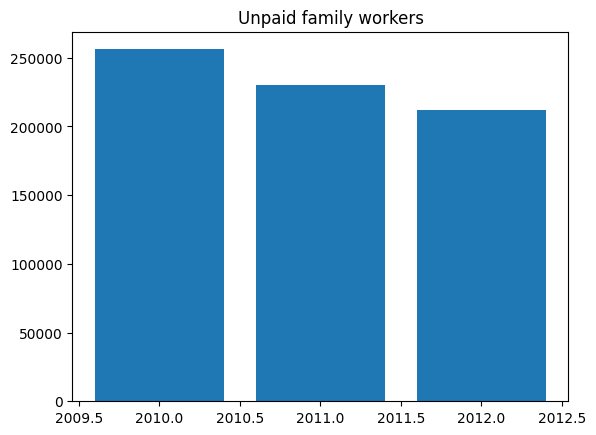

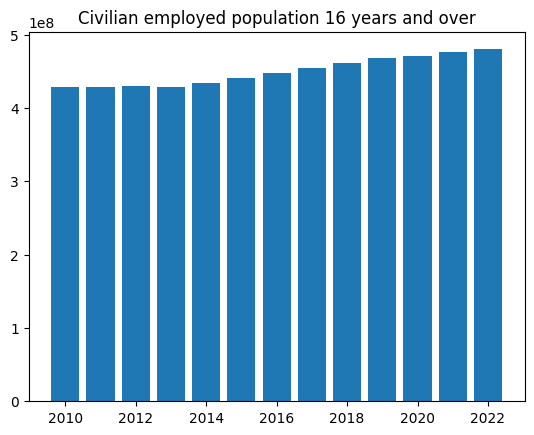

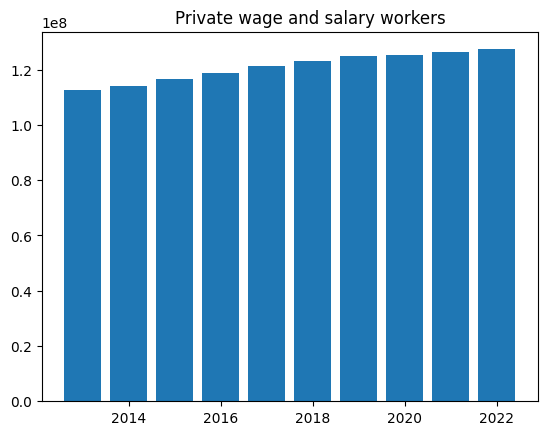

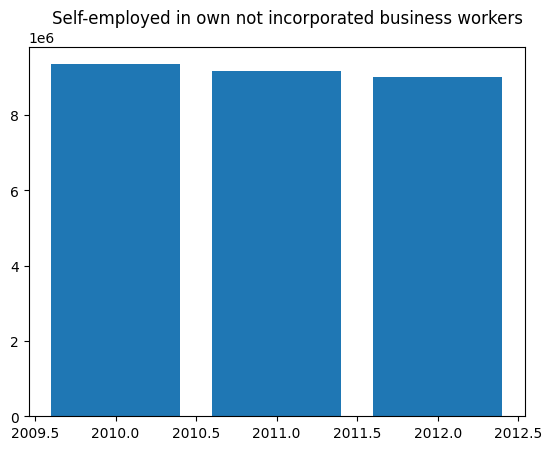




INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)





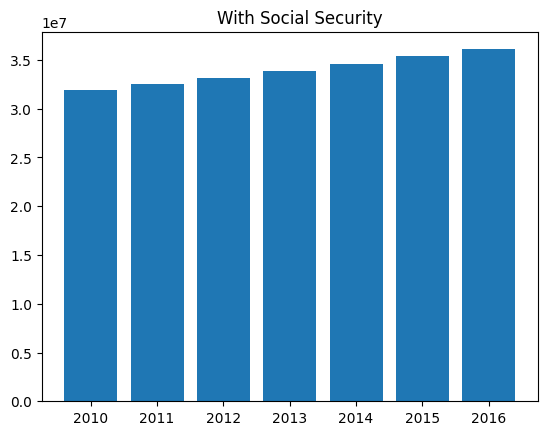

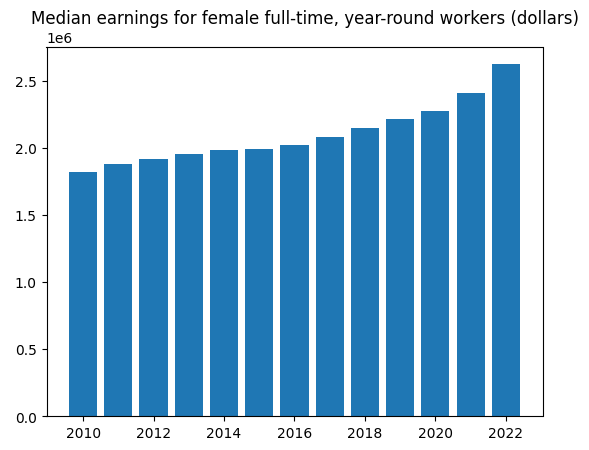

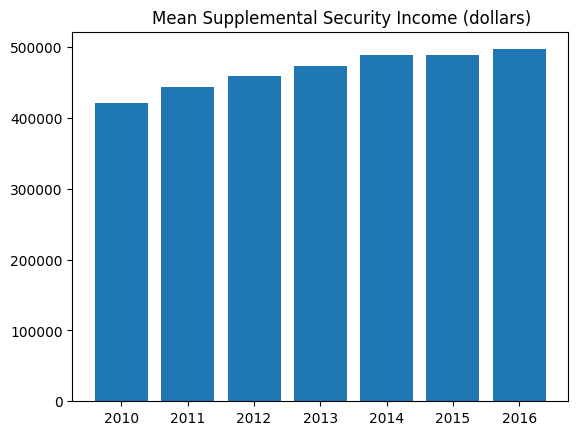

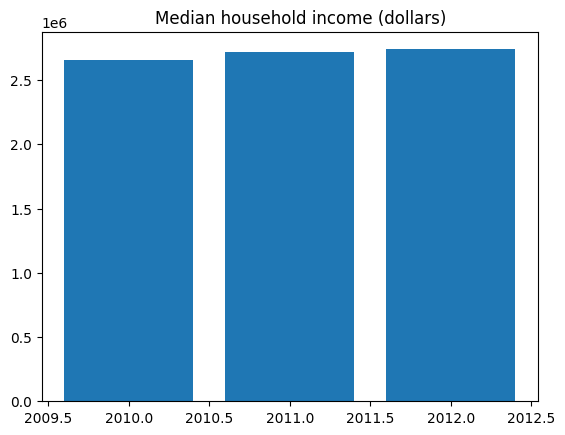

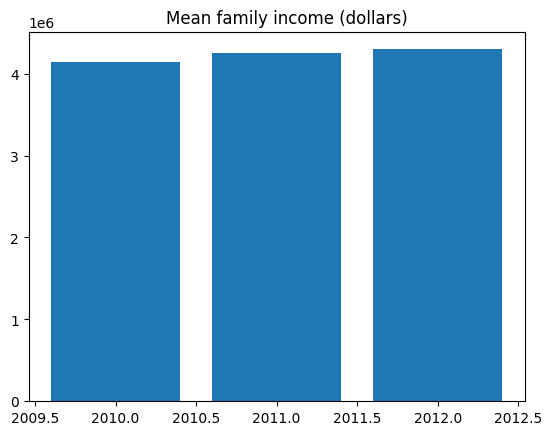

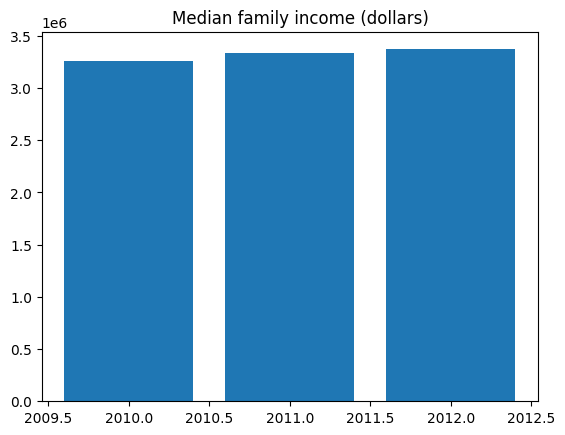

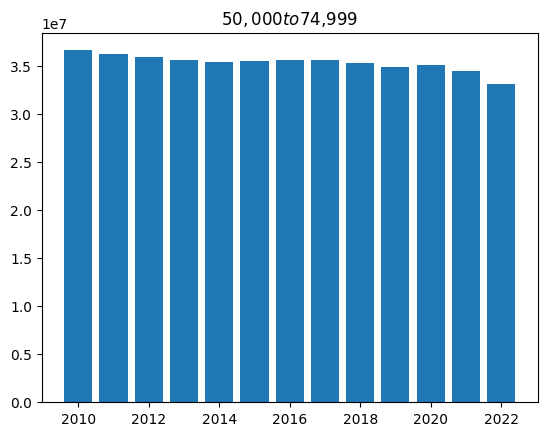

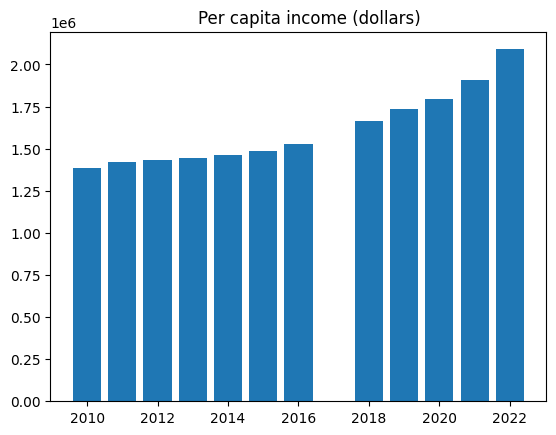

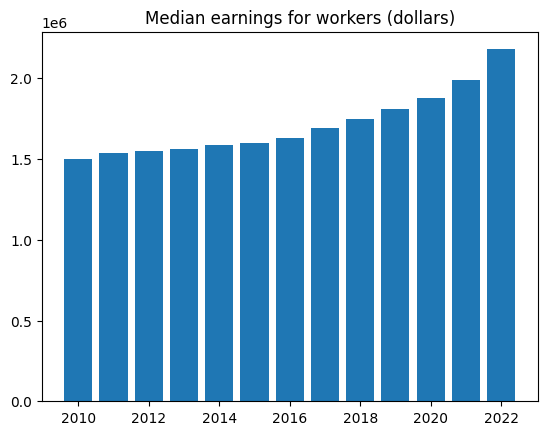

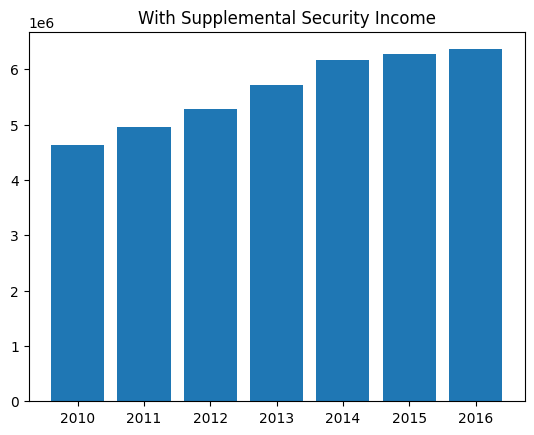

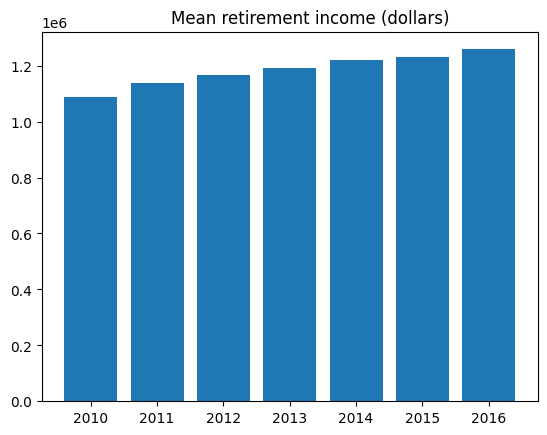

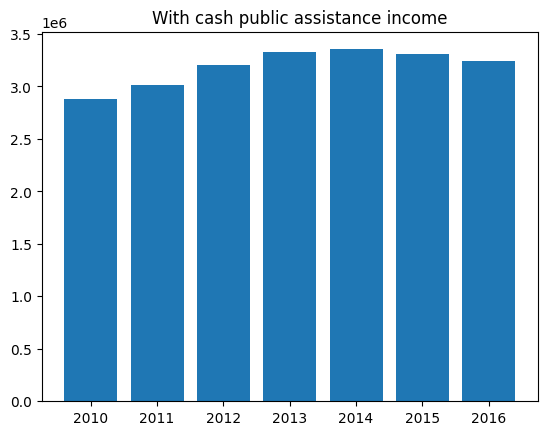

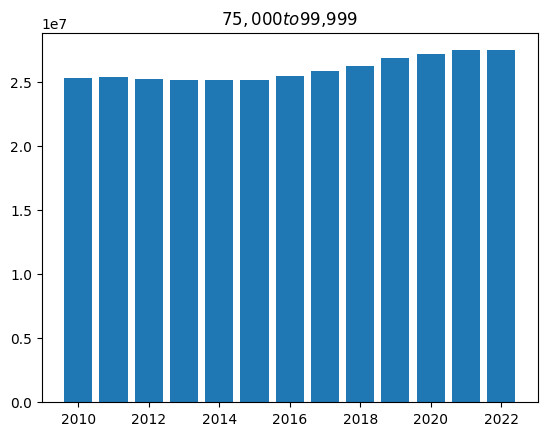

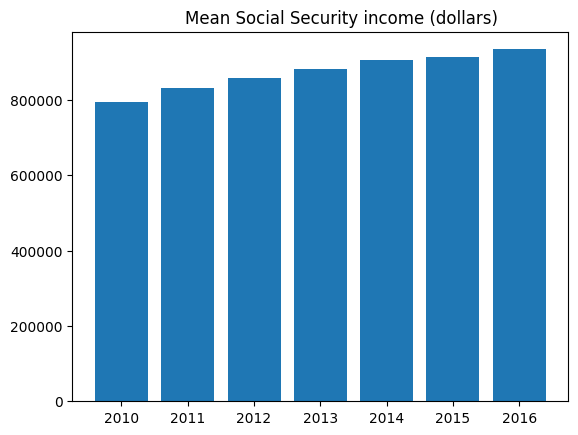

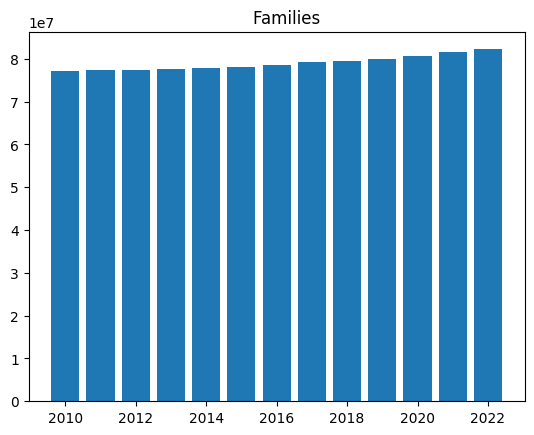

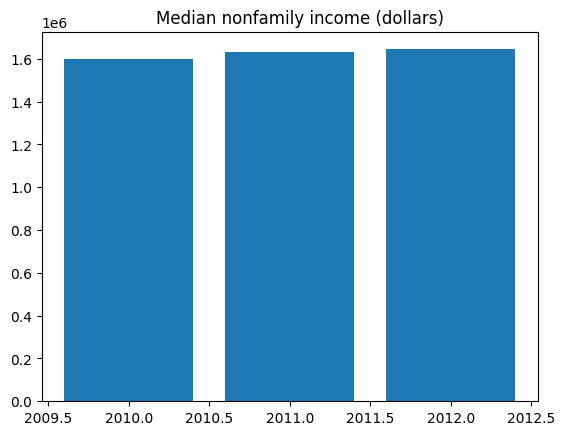

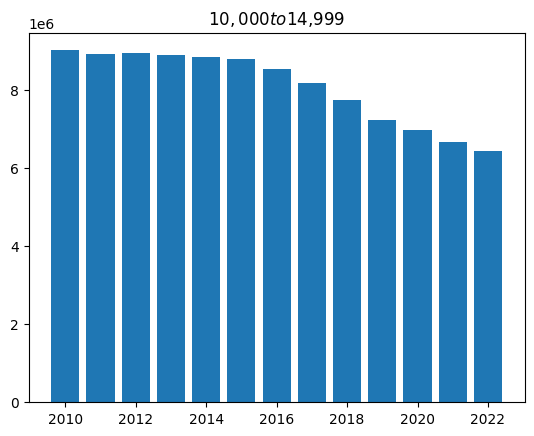

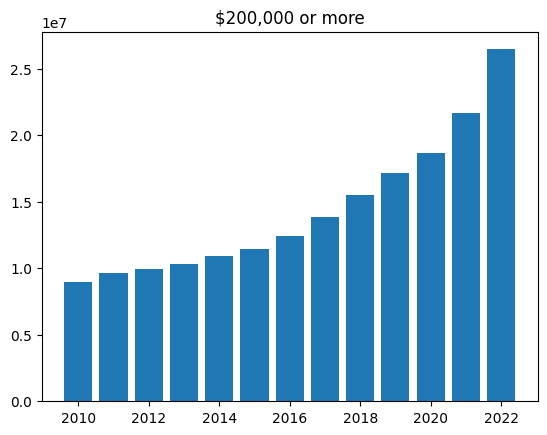

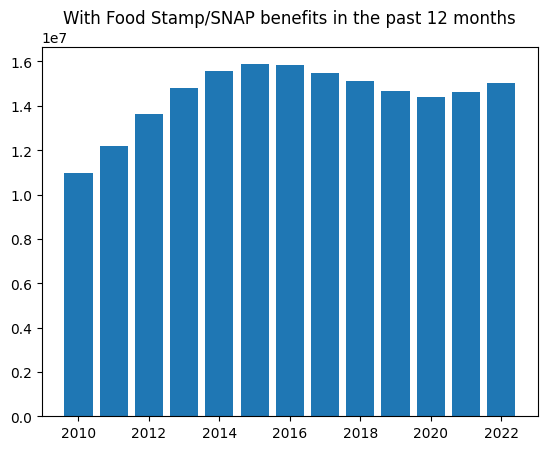

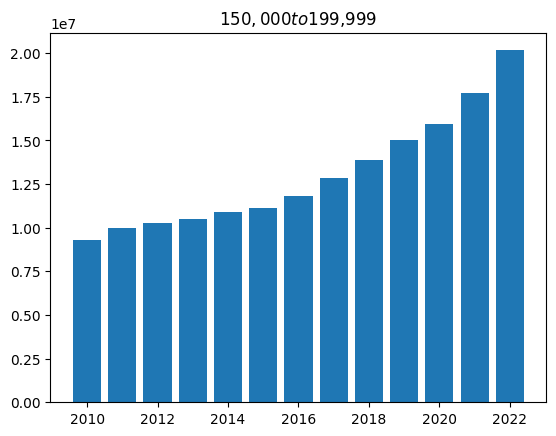

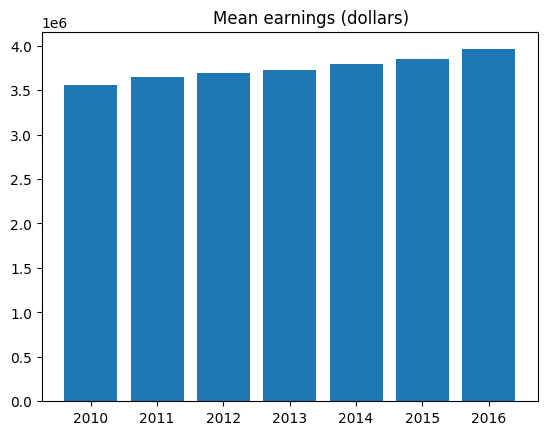

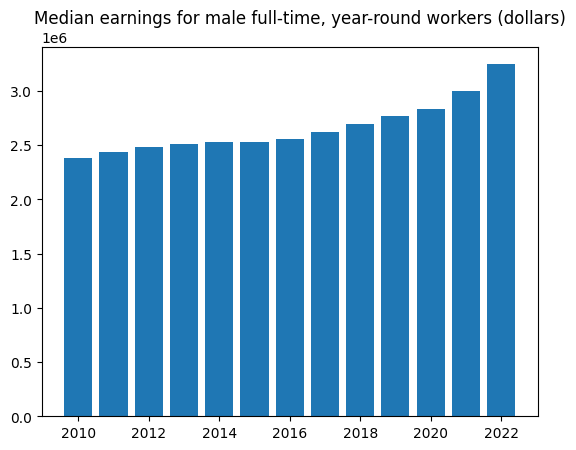

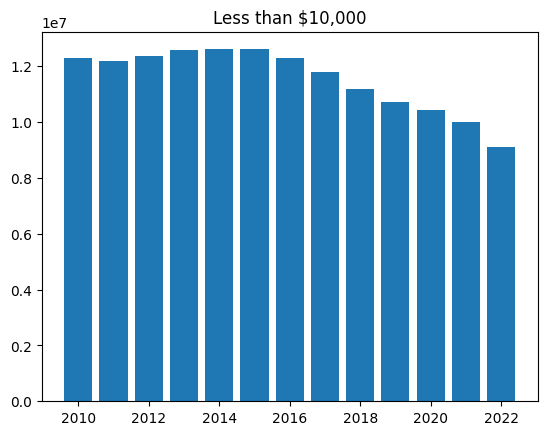

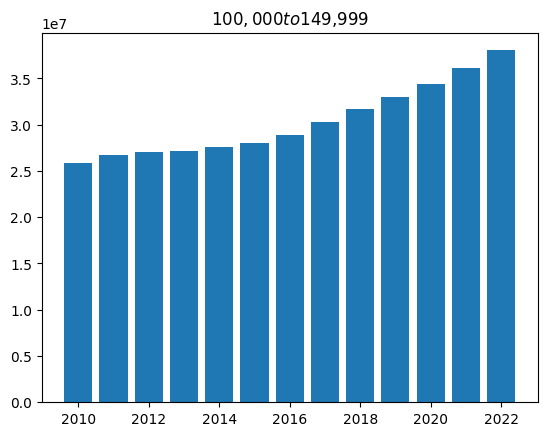

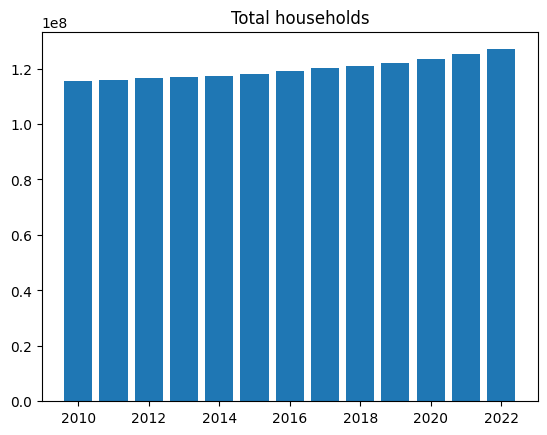

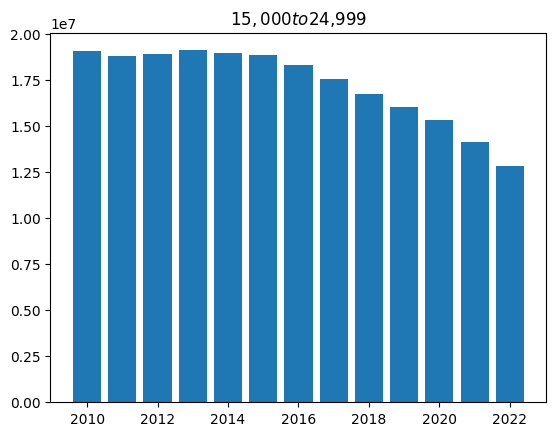

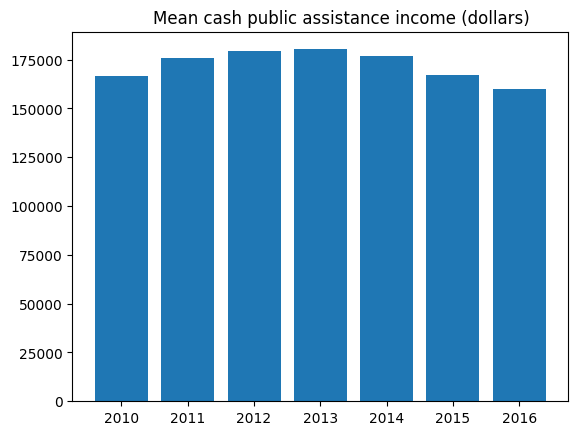

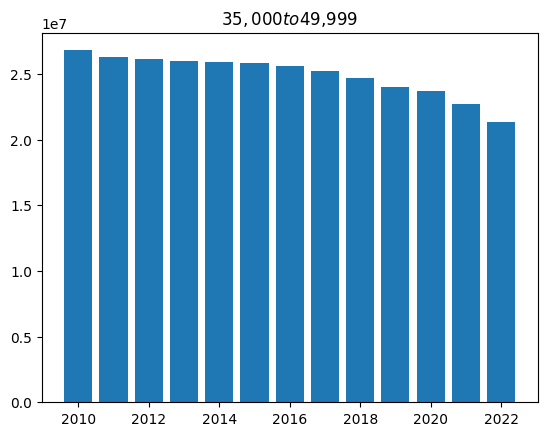

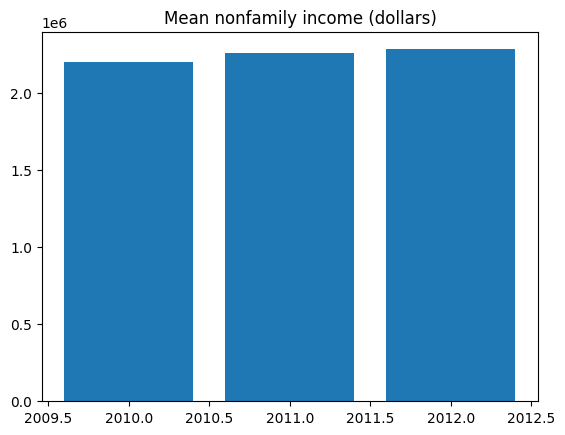

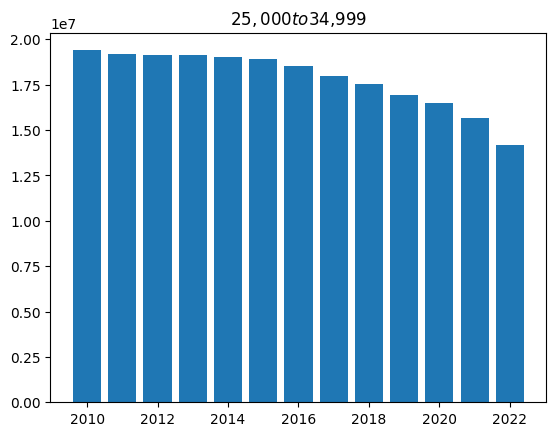

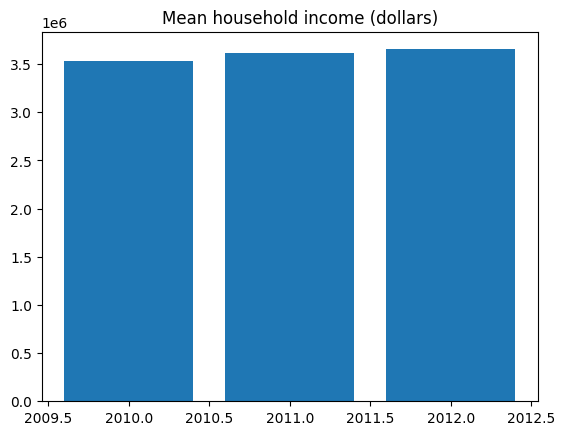

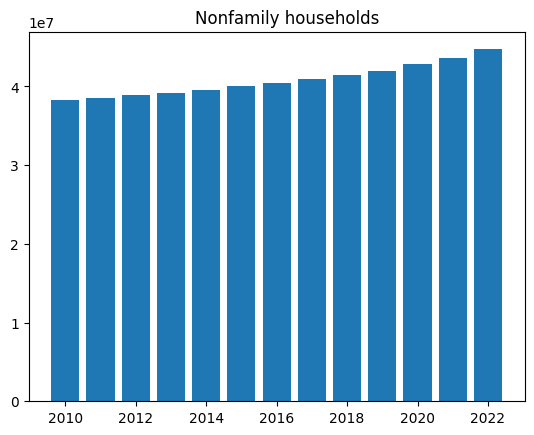

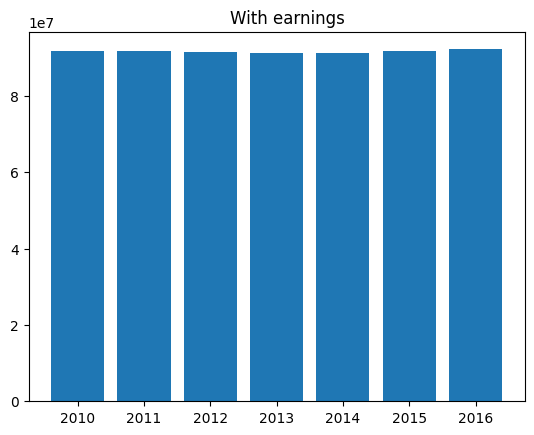

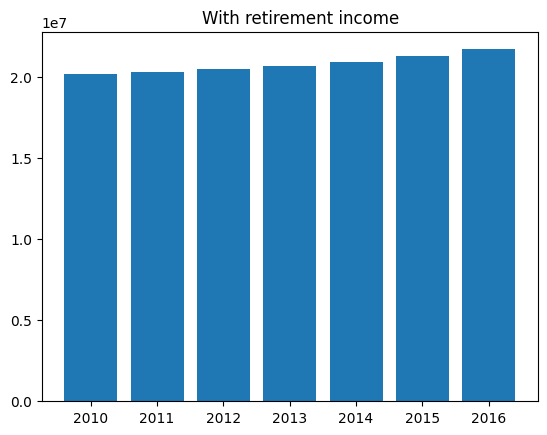




HEALTH INSURANCE COVERAGE





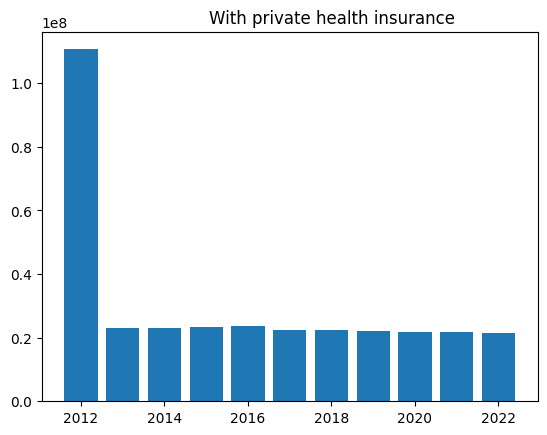

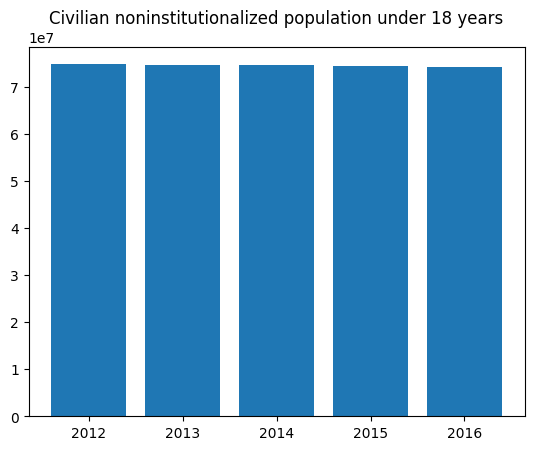

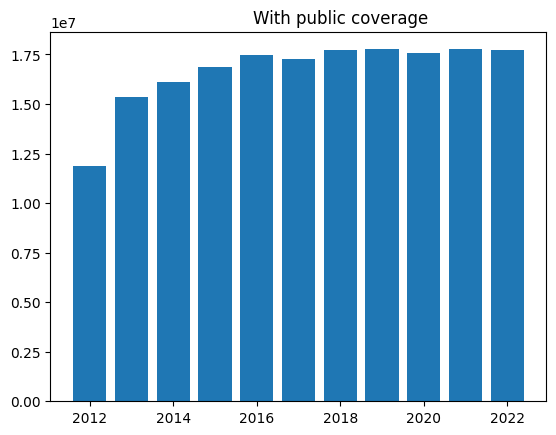

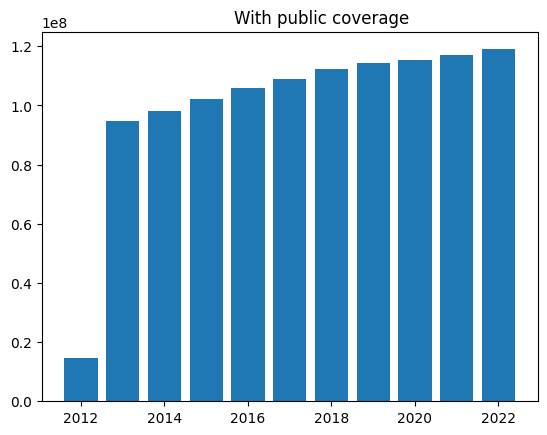

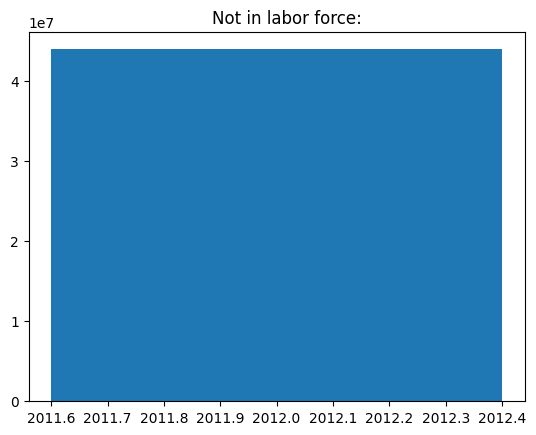

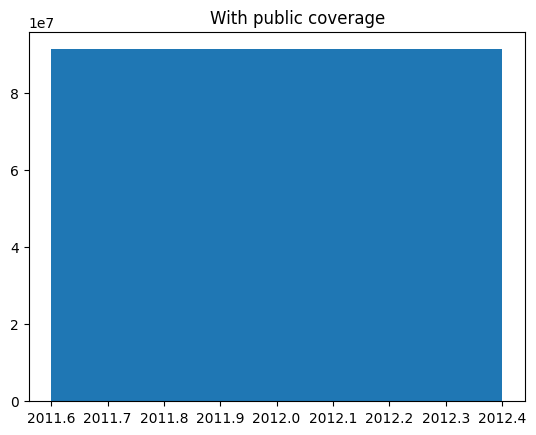

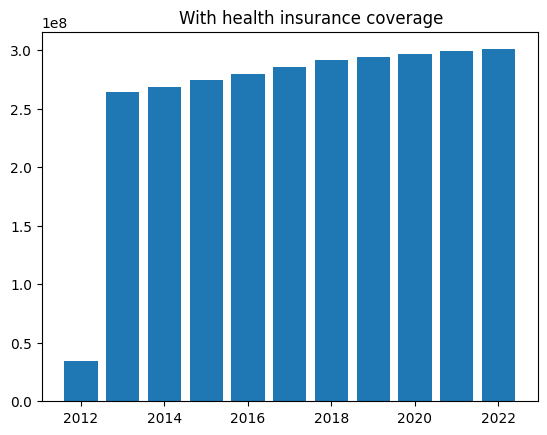

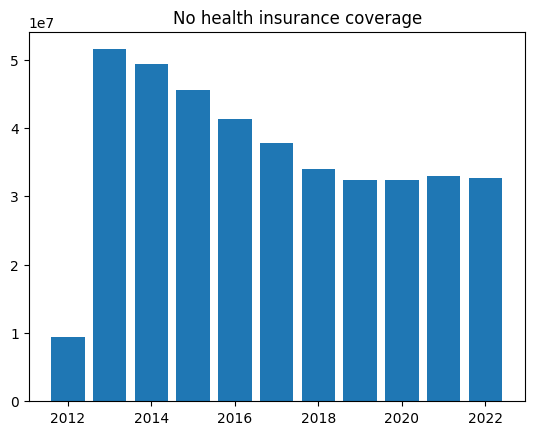

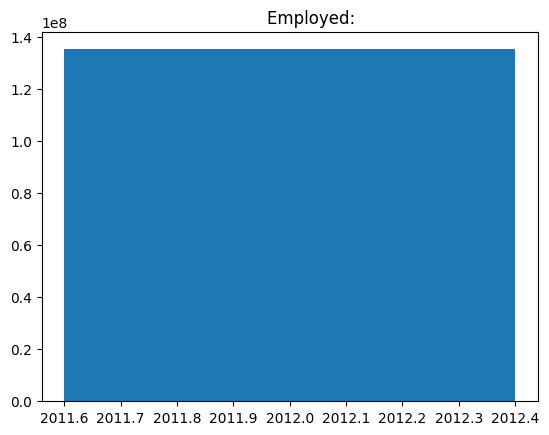

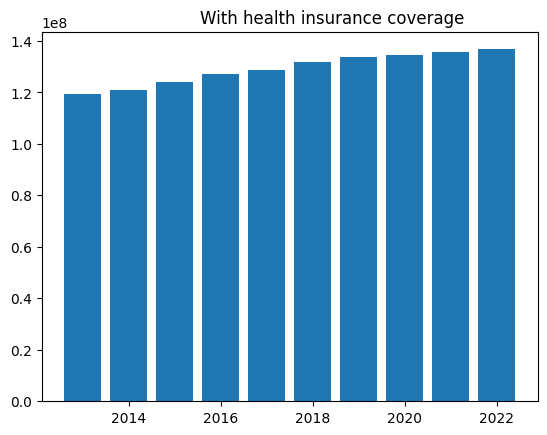

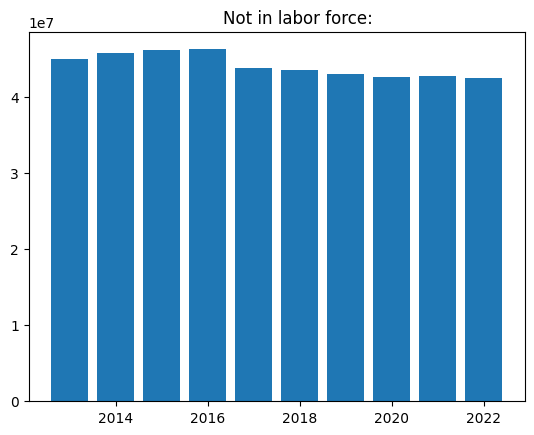

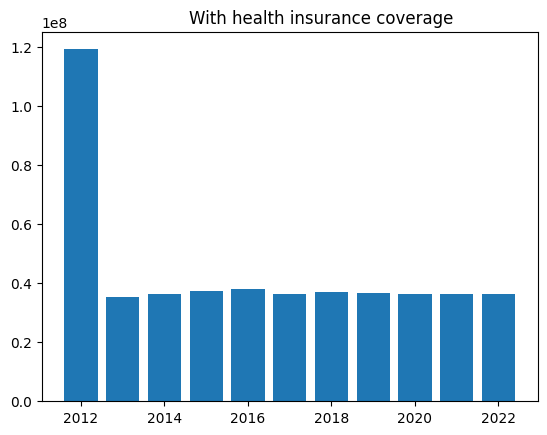

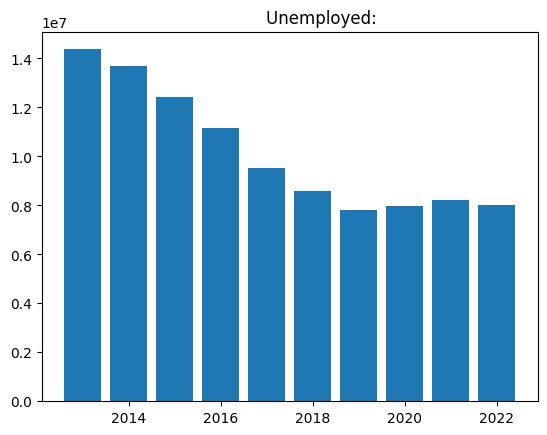

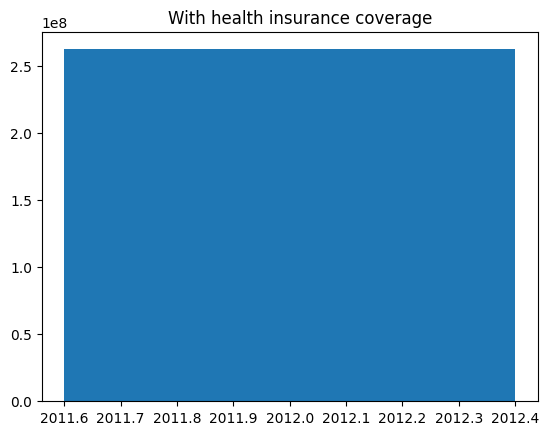

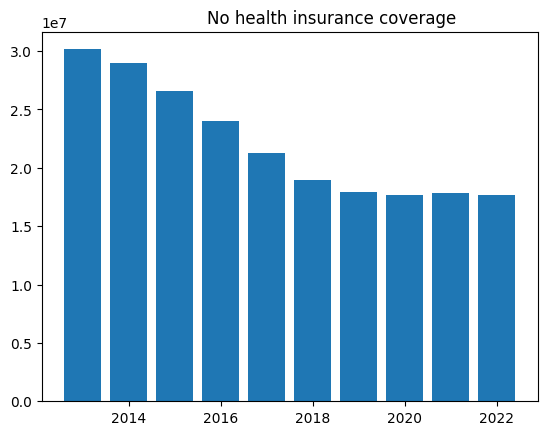

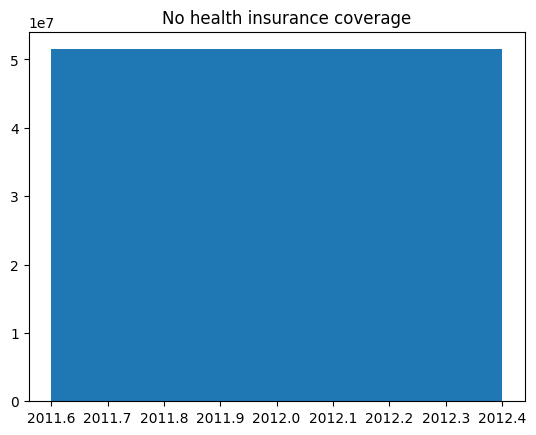

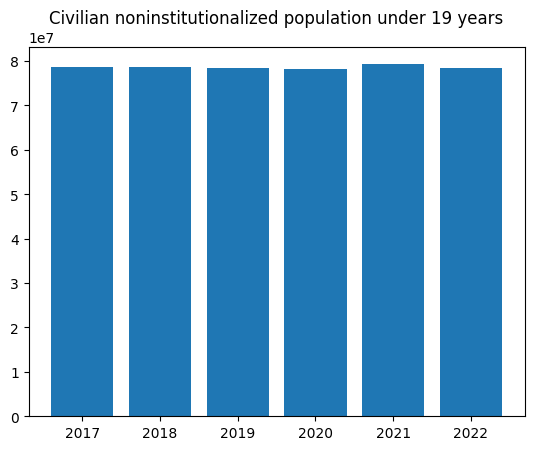

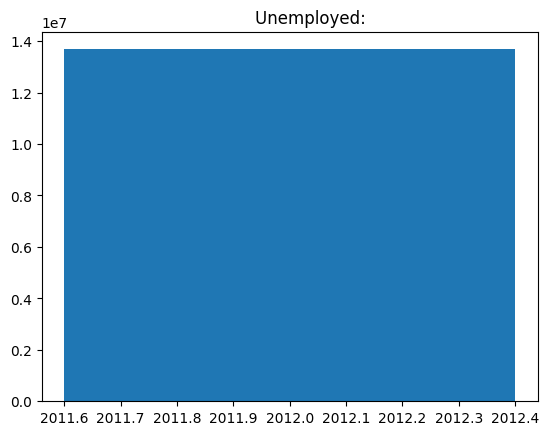

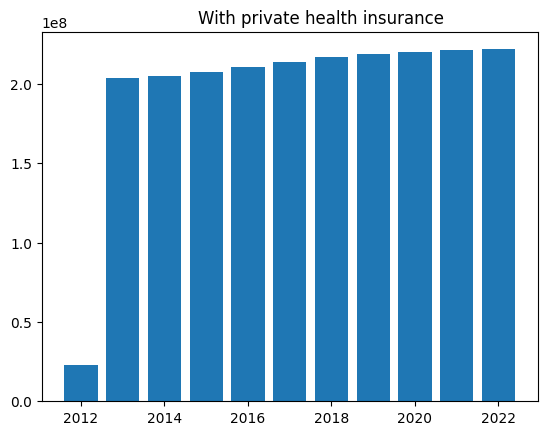

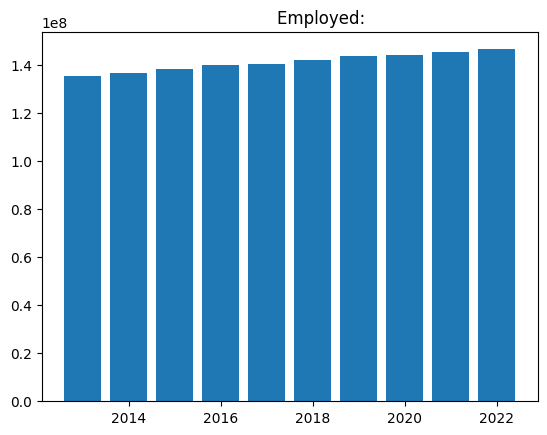

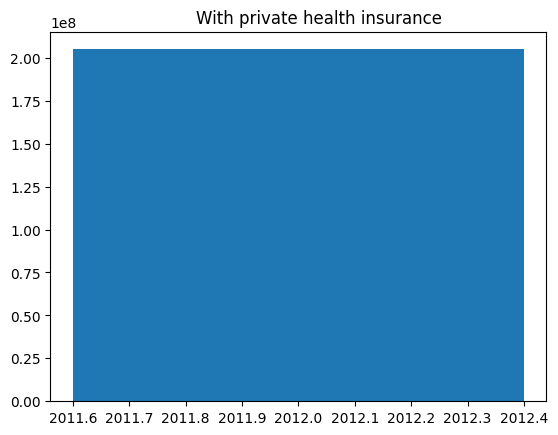

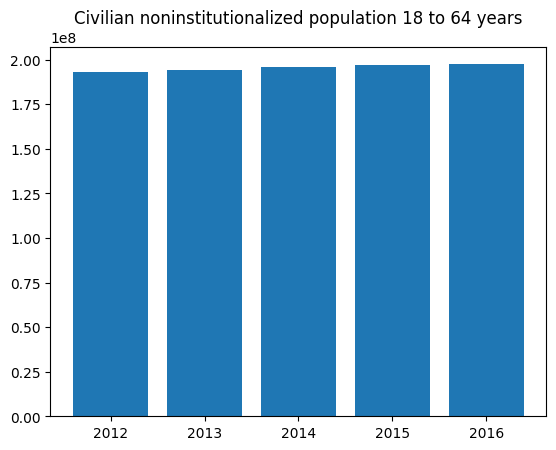

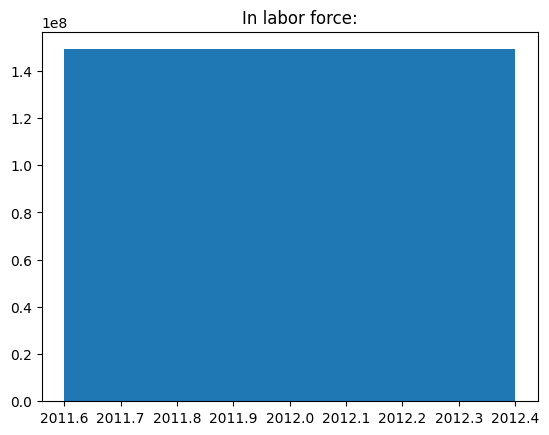

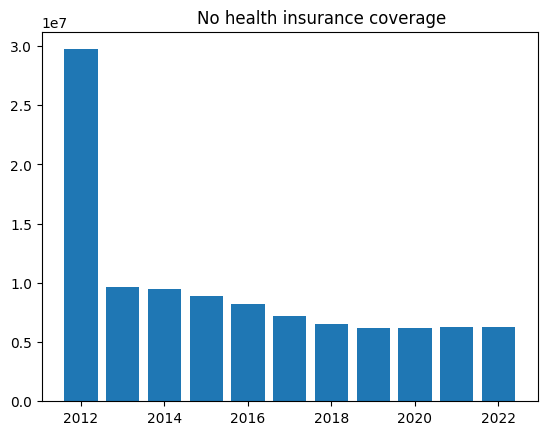

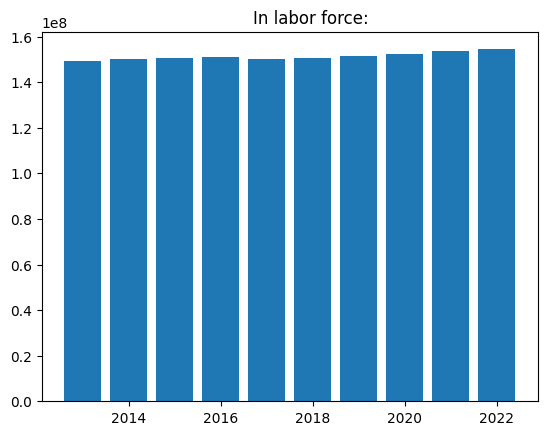

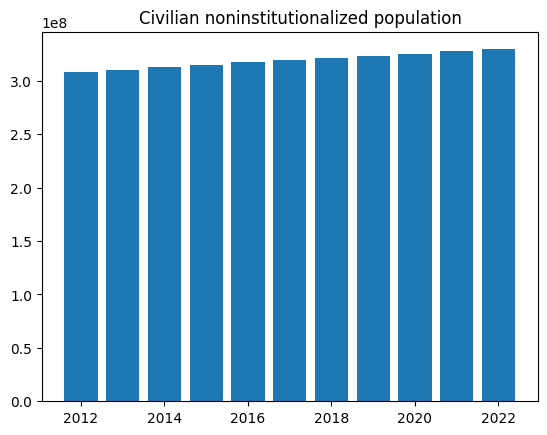

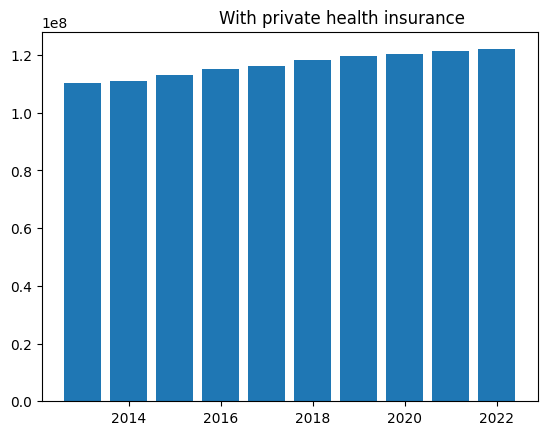

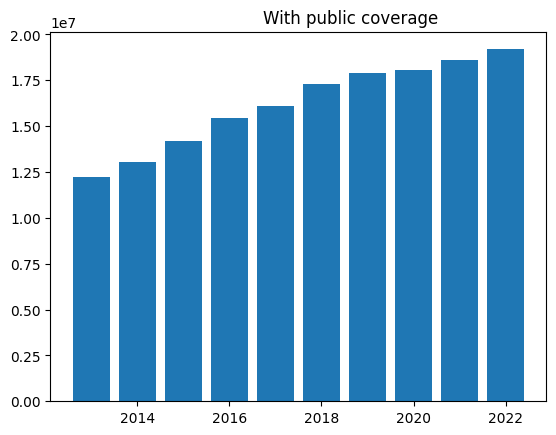

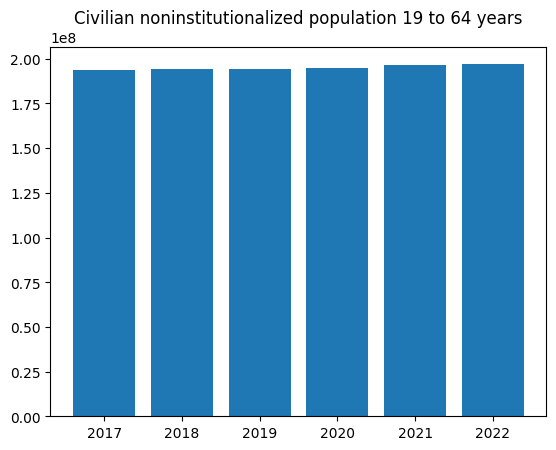




PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL





In [39]:
for grouping in survey_dfs:
    print(f"\n\n\n{grouping}\n\n\n")
    for label in survey_dfs[grouping]:
        plt.bar(survey_dfs[grouping][label]["Year"].values, survey_dfs[grouping][label]["Estimate"].values)
        plt.title(label)
        plt.show()